# Importing needed libs

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import CubicSpline
from wordcloud import WordCloud

/tmp/ipykernel_2666/4165637773.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Diving into the data (EDA)

## First lookup 

### Loading the dataset

In [2]:
songs = pd.read_csv('tracks_features.csv')

### Displaying the head records

In [3]:
songs.head()

id                   name                      album  \
0  7lmeHLHBe4nmXzuXc0HDjk                Testify  The Battle Of Los Angeles   
1  1wsRitfRRtWyEapl0q22o8        Guerrilla Radio  The Battle Of Los Angeles   
2  1hR0fIFK2qRG3f3RF70pb7       Calm Like a Bomb  The Battle Of Los Angeles   
3  2lbASgTSoDO7MTuLAXlTW0              Mic Check  The Battle Of Los Angeles   
4  1MQTmpYOZ6fcMQc56Hdo7T  Sleep Now In the Fire  The Battle Of Los Angeles   

                 album_id                       artists  \
0  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
1  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
2  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
3  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
4  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   

                   artist_ids  track_number  disc_number  explicit  \
0  ['2d0hyoQ5ynDBnkvAbJKORj']             1            1     False   
1  ['2d0hyoQ5ynDBnkvAbJKORj']             2            1      True   
2  ['2d0hyoQ5ynDBnkvAbJKORj']             3            1     False   
3  ['2d0hyoQ5ynDBnkvAbJKORj']             4            1      True   
4  ['2d0hyoQ5ynDBnkvAbJKORj']             5            1     False   

   danceability  ...  speechiness  acousticness  instrumentalness  liveness  \
0         0.470  ...       0.0727       0.02610          0.000011    0.3560   
1         0.599  ...       0.1880       0.01290          0.000071    0.1550   
2         0.315  ...       0.4830       0.02340          0.000002    0.1220   
3         0.440  ...       0.2370       0.16300          0.000004    0.1210   
4         0.426  ...       0.0701       0.00162          0.105000    0.0789   

   valence    tempo  duration_ms  time_signature  year  release_date  
0    0.503  117.906       210133             4.0  1999    1999-11-02  
1    0.489  103.680       206200             4.0  1999    1999-11-02  
2    0.370  149.749       298893             4.0  1999    1999-11-02  
3    0.574   96.752       213640             4.0  1999    1999-11-02  
4    0.539  127.059       205600             4.0  1999    1999-11-02  

[5 rows x 24 columns]

### General informations about the data

In [4]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204022 non-null  object 
 2   album             1204014 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [5]:
songs.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

### What do our columns correspond to ? 

#### Danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
#### Energy 
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
#### Key
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
#### Loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
#### Mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
#### Speechiness 
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
#### Acousticness 
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
#### Instrumentalness
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
#### Liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
#### Valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
#### Tempo 
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
#### Time_signature
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".


### Checking for null values and duplicates

In [6]:
percent_missing = songs.isna().sum() * 100 / len(songs)
missing_value_songs = pd.DataFrame({'column_name': songs.columns,
                                    'percent_missing': percent_missing.values})

missing_value_songs.sort_values(by='percent_missing', ascending=False)

column_name  percent_missing
2              album         0.000914
1               name         0.000249
0                 id         0.000000
13              mode         0.000000
22              year         0.000000
21    time_signature         0.000000
20       duration_ms         0.000000
19             tempo         0.000000
18           valence         0.000000
17          liveness         0.000000
16  instrumentalness         0.000000
15      acousticness         0.000000
14       speechiness         0.000000
12          loudness         0.000000
11               key         0.000000
10            energy         0.000000
9       danceability         0.000000
8           explicit         0.000000
7        disc_number         0.000000
6       track_number         0.000000
5         artist_ids         0.000000
4            artists         0.000000
3           album_id         0.000000
23      release_date         0.000000

**Observation**

- The only column that contains missing values is the 'Album' colum, which is normal since songs can be posted without being directly in an album. Since this analysis considers songs, we don't really care about 0.0009% missing values on this column. 

## Exploratory Data Analysis (EDA) 

Selecting only numerical columns

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
songs_numerics = songs.select_dtypes(include=numerics)
numerics_filtered = [col for col in songs_numerics if col not in ['track_number', 'disc_number', 'mode']]
songs_numerics_filtered = songs[numerics_filtered]

### Pairplot & Histograms

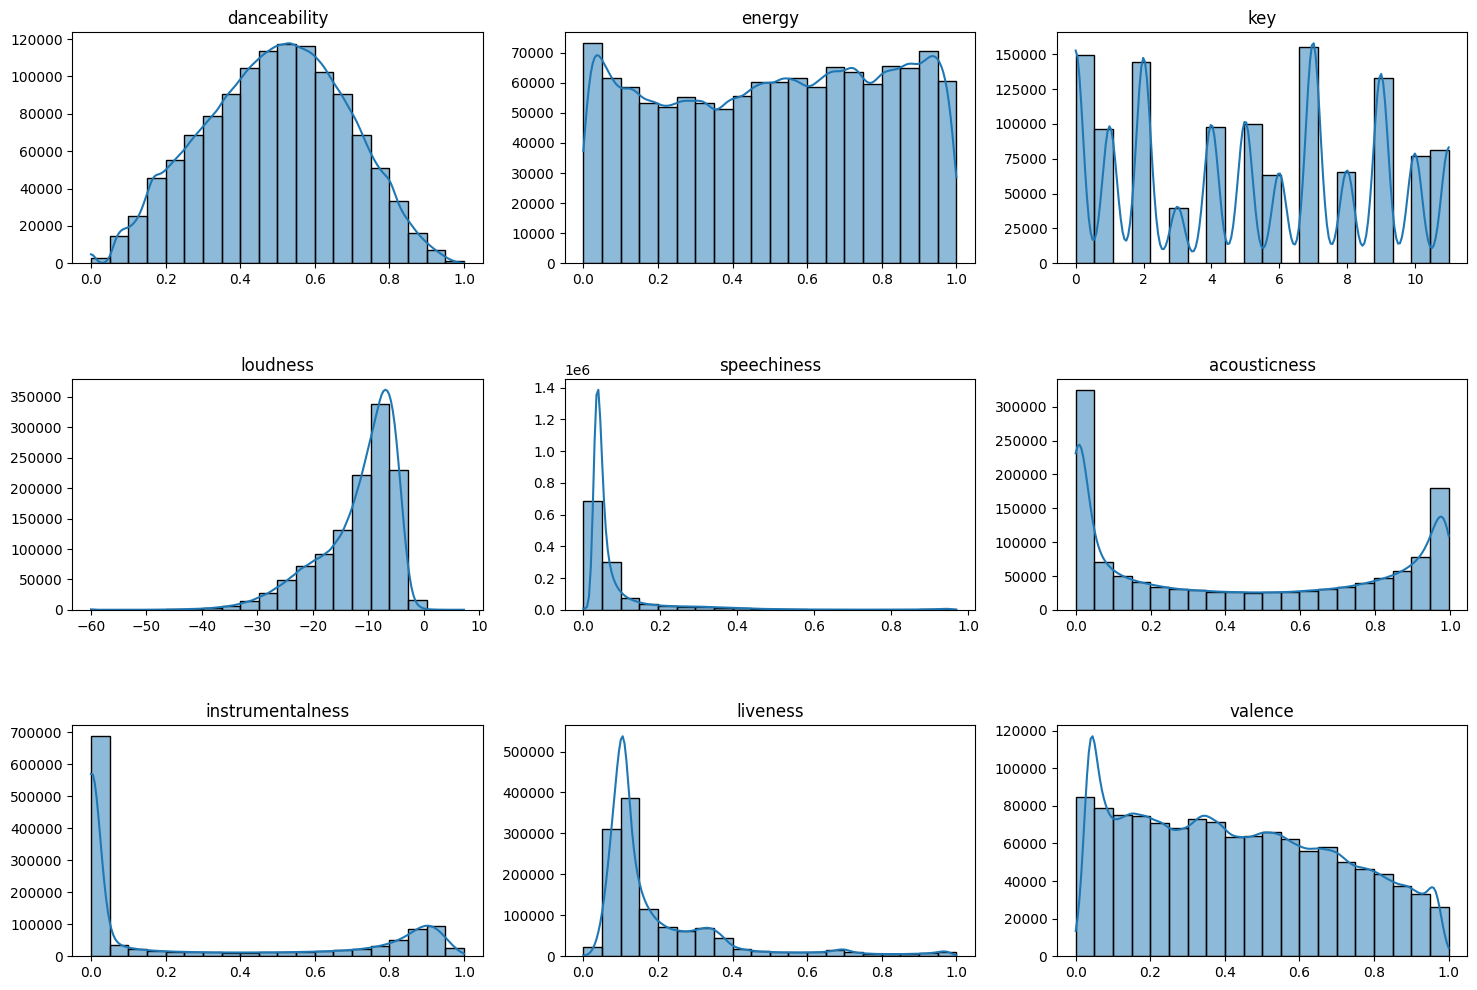

In [8]:
# Set up the figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5)

# Loop through each numeric feature and create histograms/KDEs
for ax, col in zip(axes.flatten(), songs_numerics_filtered.columns):
    sns.histplot(data=songs_numerics, x=col, kde=True, ax=ax, bins=20)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.show()

**Observation**

- We can see that there are a lot of songs that have 0 as acousticness or instumentalness. Else every numeric feature has a common logical distribution.

### Correlations between values

<Axes: >

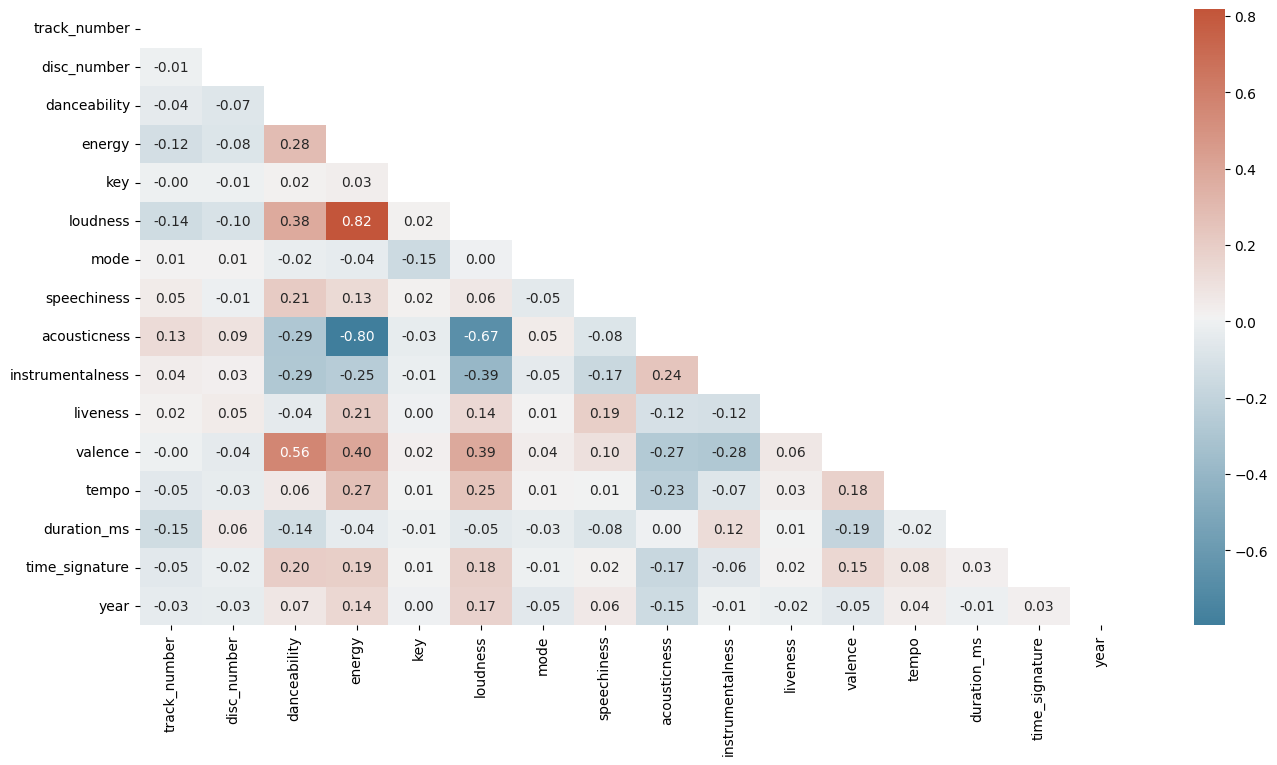

In [9]:
correlations = songs_numerics.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(correlations, dtype=bool))
plt.figure(figsize=(16,8))
sns.heatmap(songs_numerics.corr(), mask=mask, cmap=cmap, annot=True, fmt='.2f')

Let's extract extreme positive and negative correlations

In [10]:
# Extract extreme correlation values
extreme_correlations = correlations[abs(correlations) >= 0.3].stack().reset_index()
extreme_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter out perfect correlations (same feature) and redundant correlations
extreme_correlations = extreme_correlations.loc[extreme_correlations['Feature 1'] < extreme_correlations['Feature 2']]

# Create DataFrame for extreme correlations
extreme_correlations_df = pd.DataFrame(extreme_correlations)

# Display extreme correlations DataFrame
print("Highly correlated features:")
extreme_correlations_df.sort_values(by='Correlation', ascending=False)

Highly correlated features:


Feature 1 Feature 2  Correlation
6             energy  loudness     0.817934
4       danceability   valence     0.563436
8             energy   valence     0.399531
15          loudness   valence     0.385005
3       danceability  loudness     0.378194
21  instrumentalness  loudness    -0.393037
19      acousticness  loudness    -0.671553
18      acousticness    energy    -0.796242

### Trends in songs features over time

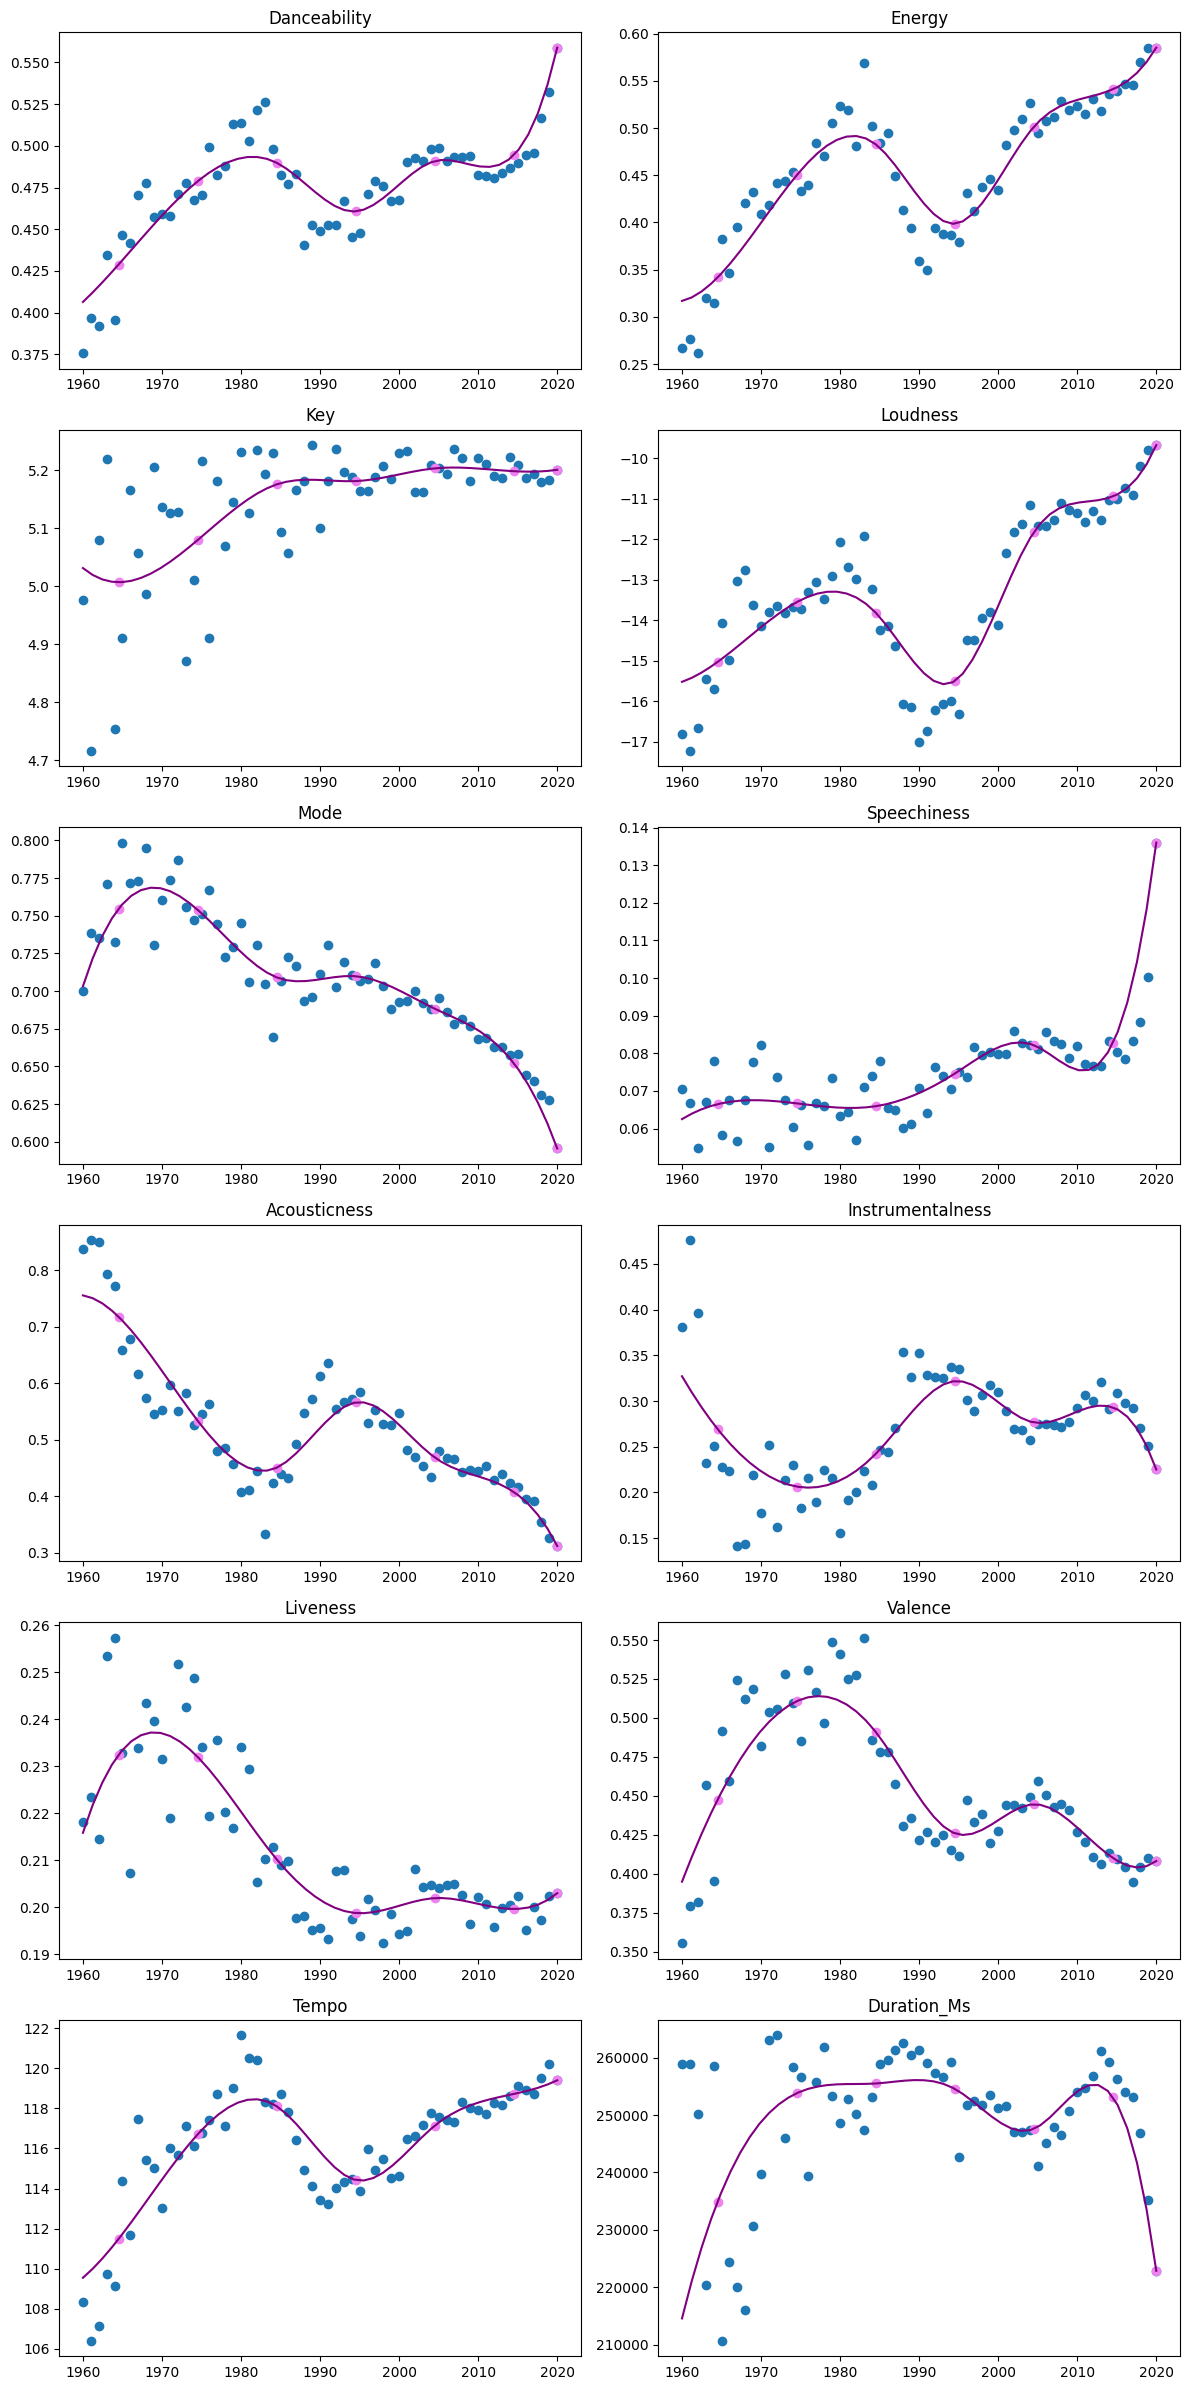

In [11]:
from scipy.interpolate import CubicSpline
# Filter songs data for years starting from 1960
songs_filtered = songs[songs['year'] >= 1960]

# Select relevant attributes for analysis
attributes = list(songs.columns[9:21])

# Group by year and calculate mean for each attribute
songs_year = songs_filtered[['year'] + attributes].groupby('year').mean()
songs_year['year'] = songs_year.index

# Calculate decade and group by decade
songs_year['decade'] = songs_year.index // 10 % 10 * 10
songs_year['decade'] = songs_year['decade'].apply(lambda d: str(d).zfill(2))
songs_decade = songs_year.groupby('decade').mean()
songs_decade = songs_decade.sort_values(by='year')

# Calculate the number of rows and columns needed for subplots
num_attributes = len(attributes)
num_rows = (num_attributes + 1) // 2  # Add 1 to ensure at least 1 row
num_cols = min(2, num_attributes)  # Maximum 2 columns

# Create subplot grid
fig, ax = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))

# Flatten ax array if it's not already flat
ax = ax.flatten()

# Iterate through each attribute
for i, att in enumerate(attributes):
    # Calculate data for plotting
    data = list(songs_year[att])
    decade_data = list(songs_decade[att])
    lin = np.linspace(1960, 2020, 50)
    cs = CubicSpline(np.unique(songs_decade['year']), songs_decade[att])
    
    # Plot original data points, decade means, and interpolated curve
    ax[i].set_title(att.title())
    ax[i].scatter(songs_year['year'], data)
    ax[i].scatter(songs_decade['year'], decade_data, color='violet')
    ax[i].plot(lin, cs(lin), color='purple')

# Remove unused subplots
for j in range(num_attributes, len(ax)):
    fig.delaxes(ax[j])

# Adjust layout and display plot
plt.tight_layout()
plt.show()


### Division of explicit vs non explicit songs

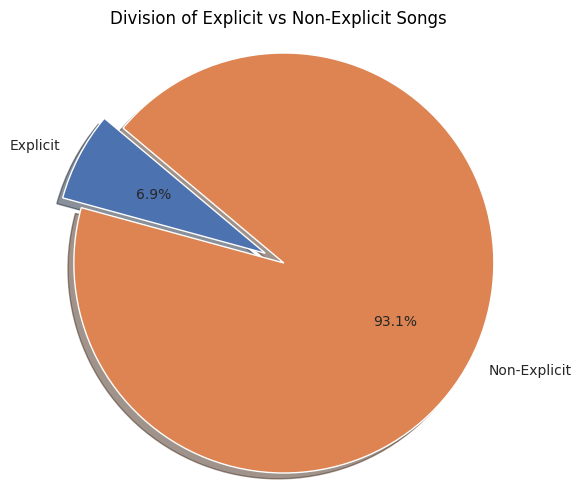

In [12]:
# Count the number of explicit and non-explicit songs
explicit_count = songs['explicit'].sum()
non_explicit_count = len(songs) - explicit_count

# Create a pie chart to visualize the division
labels = ['Explicit', 'Non-Explicit']
sizes = [explicit_count, non_explicit_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice (Explicit)

# Create a pie chart with a specific palette
plt.figure(figsize=(6, 6))
plt.title('Division of Explicit vs Non-Explicit Songs')
sns.set_style("whitegrid")
sns.set_palette("deep")  # Set the palette globally
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140, colors=sns.color_palette())
plt.axis('equal')
plt.show()



### Song duration mean/median 

In [13]:
import math

song_duration_mean = songs['duration_ms'].mean()
seconds=math.floor(song_duration_mean/1000)%60
if seconds < 10:
    seconds = '0' + str(seconds)
minutes=(song_duration_mean/(1000*60))%60
print ("The mean duration of songs: %d:%s" % (minutes, seconds))

The mean duration of songs: 4:08


In [14]:
song_duration_median = songs['duration_ms'].median()
seconds=math.floor(song_duration_median/1000)%60
if seconds < 10:
    seconds = '0' + str(seconds)
minutes=(song_duration_median/(1000*60))%60
print ("The median duration of songs: %d:%s" % (minutes, seconds))

The median duration of songs: 3:44


/tmp/ipykernel_2666/2569931883.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_last_10_years['duration_minutes'] = songs_last_10_years['duration_ms'] / 60000


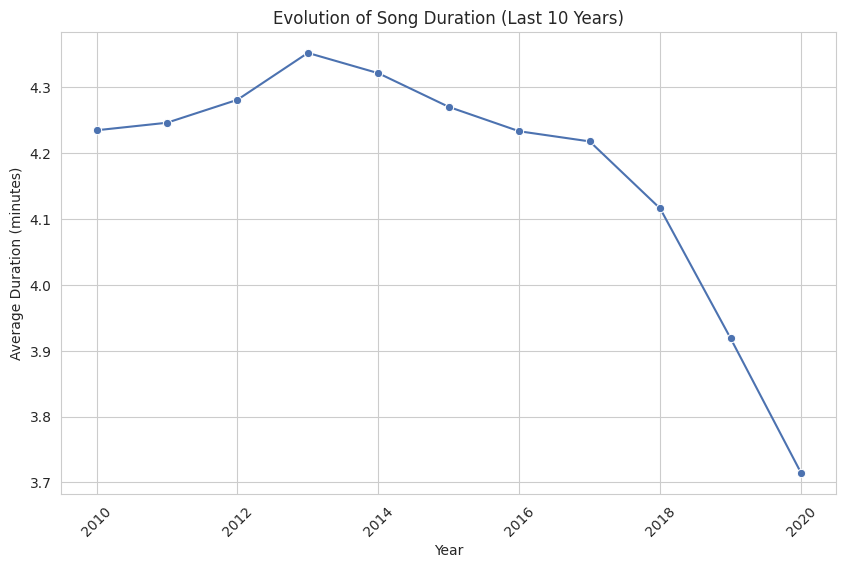

In [15]:
import seaborn as sns

# Filter songs data for the last 10 years
songs_last_10_years = songs[songs['year'] >= (songs['year'].max() - 10)]

# Convert duration from milliseconds to minutes
songs_last_10_years['duration_minutes'] = songs_last_10_years['duration_ms'] / 60000

# Group by year and calculate the average duration of songs
average_duration_by_year = songs_last_10_years.groupby('year')['duration_minutes'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_duration_by_year, x='year', y='duration_minutes', marker='o')

# Set plot title and labels
plt.title('Evolution of Song Duration (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True)  # Add grid lines
plt.show()



### Conclusion

We gained insights about the trends in Spotify songs.

    -
    -
    -
    -

 Now we wanna make an NLP analysis. 
 For this we use second dataset that contains lyrics. 

# NLP

The table named Spotify Million Song Dataset has 57,650 rows and 4 columns, with column names 'artist', 'song', 'link', and 'text', all of which are of string type. It provides a comprehensive collection of data that can be analyzed to gain insights into various aspects of the songs in the Spotify library. 

### Loading the dataset

In [16]:
lyrics = pd.read_csv('Spotify Million Song Dataset_exported.csv')


### Basic EDA

In [17]:
lyrics.tail()

artist           song  \
57645  Ziggy Marley  Good Old Days   
57646  Ziggy Marley  Hand To Mouth   
57647          Zwan   Come With Me   
57648          Zwan         Desire   
57649          Zwan      Heartsong   

                                              link  \
57645  /z/ziggy+marley/good+old+days_10198588.html   
57646  /z/ziggy+marley/hand+to+mouth_20531167.html   
57647           /z/zwan/come+with+me_20148981.html   
57648                 /z/zwan/desire_20148986.html   
57649              /z/zwan/heartsong_20148991.html   

                                                    text  
57645  Irie days come on play  \nLet the angels fly l...  
57646  Power to the workers  \nMore power  \nPower to...  
57647  all you need  \nis something i'll believe  \nf...  
57648  northern star  \nam i frightened  \nwhere can ...  
57649  come in  \nmake yourself at home  \ni'm a bit ...

In [18]:
lyrics.shape

(57650, 4)

In [19]:
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [20]:
lyrics.describe()

artist                                    song  \
count          57650                                   57650   
unique           643                                   44824   
top     Donna Summer  Have Yourself A Merry Little Christmas   
freq             191                                      35   

                                              link  \
count                                        57650   
unique                                       57650   
top     /a/abba/ahes+my+kind+of+girl_20598417.html   
freq                                             1   

                                                     text  
count                                               57650  
unique                                              57494  
top     I just came back from a lovely trip along the ...  
freq                                                    6

In [21]:
lyrics.nunique()

artist      643
song      44824
link      57650
text      57494
dtype: int64

In [22]:
lyrics.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [23]:
lyrics.duplicated().sum()

0

In [24]:
print("Dataset Shape:", lyrics.shape)
print("\nData Types:\n", lyrics.dtypes)
print("\nMissing Values:\n", lyrics.isnull().sum())

Dataset Shape: (57650, 4)

Data Types:
 artist    object
song      object
link      object
text      object
dtype: object

Missing Values:
 artist    0
song      0
link      0
text      0
dtype: int64


### Sentiment analysis

In [25]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


In [26]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/ziraax/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ziraax/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ziraax/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
text_length = lyrics.apply(lambda x: len(str(x)))
average_length = text_length.mean()
average_length

494.25

In [28]:
# Initialize Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis to the 'text' column
lyrics['sentiment_score'] = lyrics['text'].apply(get_sentiment_score)

# Function to categorize sentiment
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment categorization
lyrics['sentiment'] = lyrics['sentiment_score'].apply(categorize_sentiment)
sorted_lyrics = lyrics.sort_values(by='sentiment_score', ascending=False)

# View the dataset with sentiment scores and categories
print(sorted_lyrics[['artist', 'song', 'sentiment_score', 'sentiment']])


                artist                       song  sentiment_score sentiment
12310          Madonna               It's So Cool           0.9999  Positive
25169     Bette Midler                      Moses           0.9999  Positive
48511          Pitbull                   Oye Baby           0.9999  Positive
41293      Lauryn Hill  Turn Your Lights Down Low           0.9999  Positive
40630             Kiss             Do You Love Me           0.9999  Positive
...                ...                        ...              ...       ...
50936  Robbie Williams                   Dickhead          -0.9998  Negative
22037               YG                Still Brazy          -0.9998  Negative
7289        Gucci Mane    I Shook Them Haters Off          -0.9999  Negative
20902   Violent Femmes                    I'm Bad          -0.9999  Negative
57398         Yoko Ono                    Scumbag          -0.9999  Negative

[57650 rows x 4 columns]


In [29]:
sorted_lyrics[['artist', 'song', 'sentiment_score', 'sentiment']]

artist                       song  sentiment_score sentiment
12310          Madonna               It's So Cool           0.9999  Positive
25169     Bette Midler                      Moses           0.9999  Positive
48511          Pitbull                   Oye Baby           0.9999  Positive
41293      Lauryn Hill  Turn Your Lights Down Low           0.9999  Positive
40630             Kiss             Do You Love Me           0.9999  Positive
...                ...                        ...              ...       ...
50936  Robbie Williams                   Dickhead          -0.9998  Negative
22037               YG                Still Brazy          -0.9998  Negative
7289        Gucci Mane    I Shook Them Haters Off          -0.9999  Negative
20902   Violent Femmes                    I'm Bad          -0.9999  Negative
57398         Yoko Ono                    Scumbag          -0.9999  Negative

[57650 rows x 4 columns]

/tmp/ipykernel_2666/2120241176.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sorted_lyrics, x='sentiment', palette={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'})


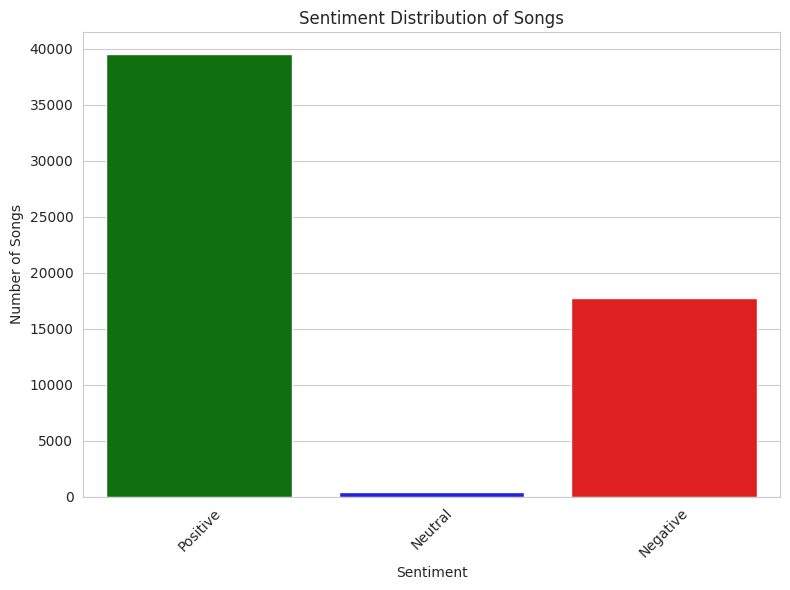

In [30]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=sorted_lyrics, x='sentiment', palette={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'})
plt.title('Sentiment Distribution of Songs')
plt.xlabel('Sentiment')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

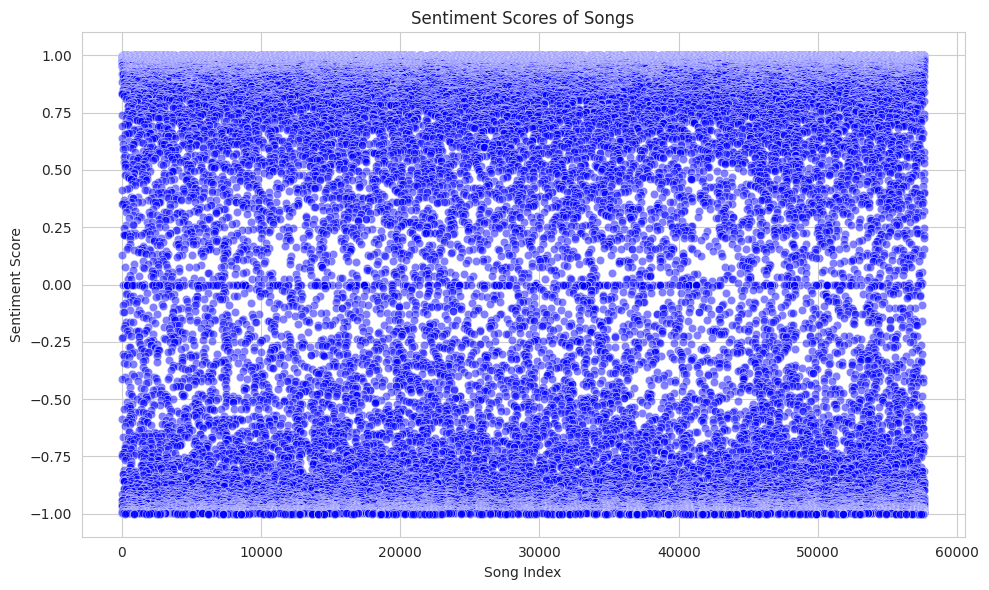

In [31]:
# Plot the sentiment scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sorted_lyrics, x=sorted_lyrics.index, y='sentiment_score', color='blue', alpha=0.5)
plt.title('Sentiment Scores of Songs')
plt.xlabel('Song Index')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()

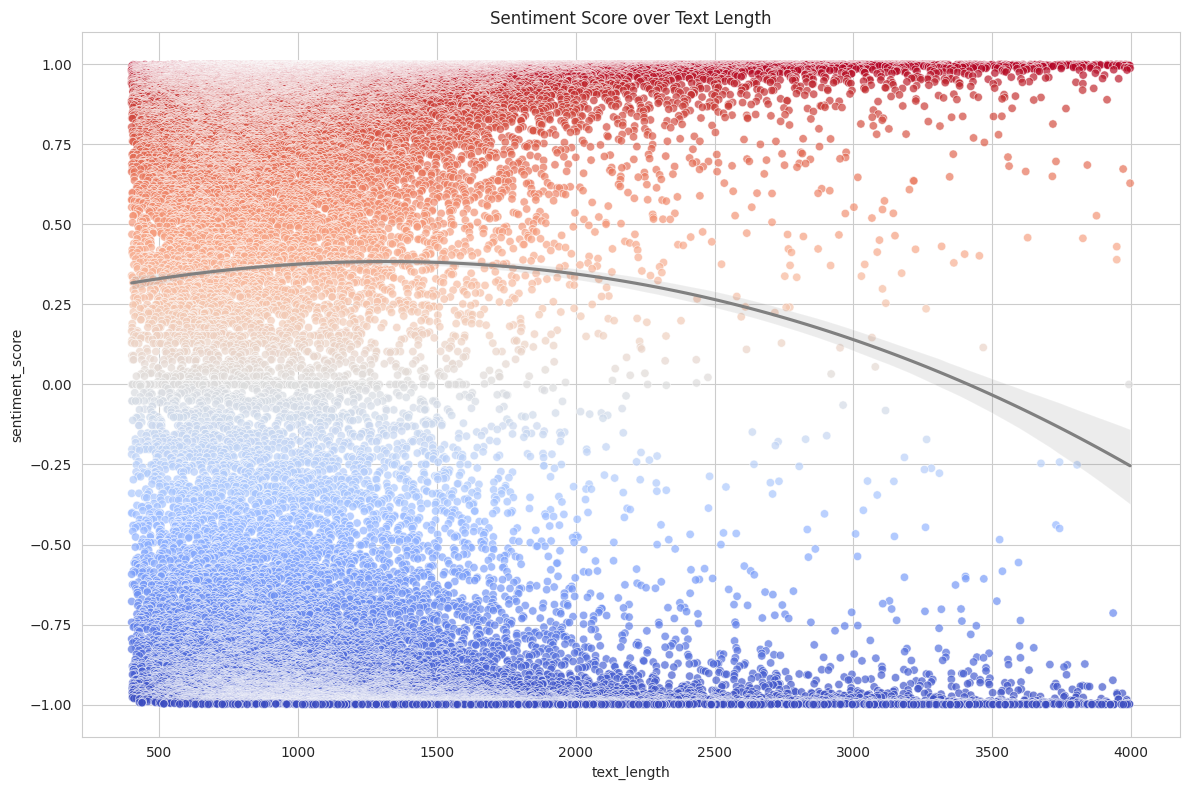

In [32]:
# Assuming 'sorted_lyrics' is your DataFrame
sorted_lyrics['text_length'] = sorted_lyrics['text'].apply(len)

# Set the style of seaborn
sns.set_style("whitegrid")

# Plot the sentiment score over text length with color gradient and size variation
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sorted_lyrics, x='text_length', y='sentiment_score', 
                hue='sentiment_score', palette='coolwarm', alpha=0.7, legend=False)
plt.title('Sentiment Score over Text Length')
plt.xlabel('Text Length')
plt.ylabel('Sentiment Score')

# Add polynomial trend line (degree=3)
sns.regplot(data=sorted_lyrics, x='text_length', y='sentiment_score', scatter=False, color='gray', order=3)

plt.grid(True)
plt.tight_layout()
plt.show()


### Latent Dirichlet Allocation (LDA) Overview

LDA is a statistical model used for uncovering hidden themes or topics within a collection of documents. Here's a breakdown of how it works:

1. **Initialization**: LDA begins by assuming random assignments of words to topics across all documents.

2. **Iteration**: It iteratively refines its understanding of the topic structure by adjusting word-topic assignments based on the probability of words belonging to certain topics and the likelihood of topics appearing in certain documents.

3. **Result**: After many iterations, LDA settles into a configuration where it believes it has identified meaningful topics. Each topic is represented by a distribution of words, and each document is represented by a distribution of topics.

4. **Interpretation**: Once trained, the model allows for the interpretation of topics by examining the words with the highest probabilities within each topic. These words represent the themes or concepts associated with that topic.

Overall, LDA provides a way to organize and understand large collections of text data by uncovering the underlying structure of topics present in the documents. It's widely used in various fields like natural language processing, social sciences, and information retrieval to analyze text data and extract meaningful insights.

### Mathematical Formulation of Latent Dirichlet Allocation (LDA)

#### Notation:

- $\theta_d$: Number of documents
- $N$: Number of words in a document
- $K$: Number of topics
- $V$: Vocabulary size (total number of unique words)

#### Model Representation:

1. **Document-Topic Distribution**:
   - $\theta_d$ represents the distribution of topics for document $d$.
   
2. **Topic-Word Distribution**:
   - $\beta_k$ represents the distribution of words for topic $k$.

3. **Topic Assignment**:
   - $z_{d,n}$ represents the topic assignment for the $n$-th word in document $d$.
   
4. **Word Generation**:
   - $w_{d,n}$ represents the $n$-th word in document $d$.

#### Generative Process:

1. For each topic $k$ from 1 to $K$:
   - Sample $\beta_k$ from a Dirichlet distribution with parameter $\eta$.
   
2. For each document $d$ from 1 to $D$:
   - Sample $\theta_d$ from a Dirichlet distribution with parameter $\alpha$.
   - For each word $n$ from 1 to $N$:
     - Sample $z_{d,n}$ from a multinomial distribution with parameter $\theta_d$.
     - Sample $w_{d,n}$ from a multinomial distribution with parameter $\beta_{z_{d,n}}$.

#### Goal:

Given a corpus of documents $W$, the goal of LDA is to infer the posterior distributions:
- $p(\theta_d | W)$ (document-topic distributions)
- $p(\beta_k | W)$ (topic-word distributions)
- $p(z_{d,n}, \theta_d, \beta_k | W)$ (topic assignments, document-topic distributions, and topic-word distributions)

#### Likelihood:

The likelihood of observing the data given the parameters in LDA is calculated as the product of probabilities of observing each word in each document under the inferred distributions.

This mathematical framework allows LDA to model the underlying structure of topics within a corpus of text documents, enabling topic discovery and document representation.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Initialize CountVectorizer to convert lyrics into a bag-of-words representation
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(lyrics['text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Extract and print topics
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic 1:
la night come ll day away like light home god
Topic 2:
don baby know want just come let got ll wanna
Topic 3:
oh yeah got like gonna hey ain ya don know
Topic 4:
man said just like got good old did dance people
Topic 5:
love ll ve know just heart time way like feel


### WordClouds

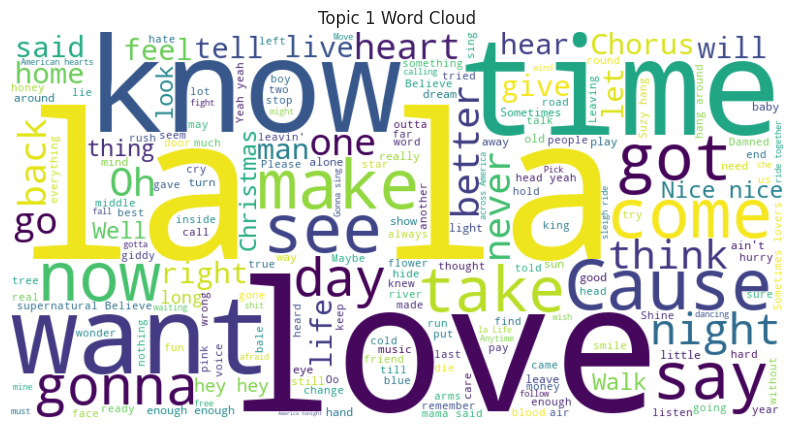

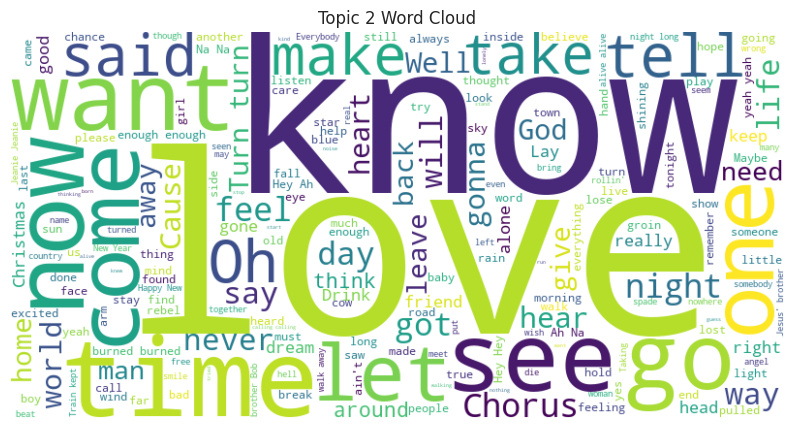

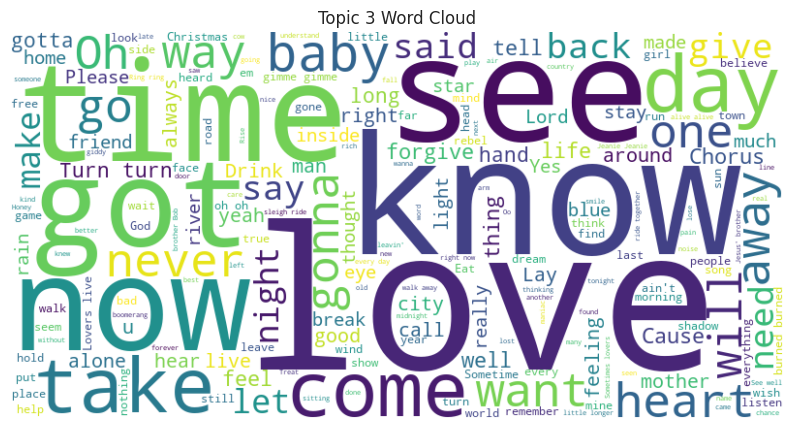

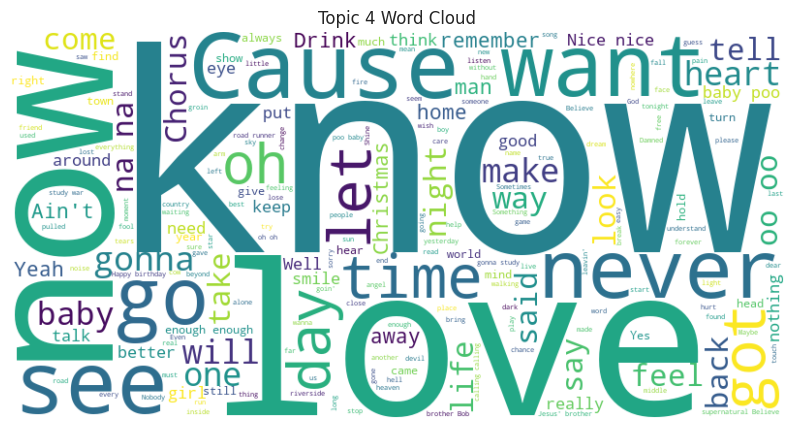

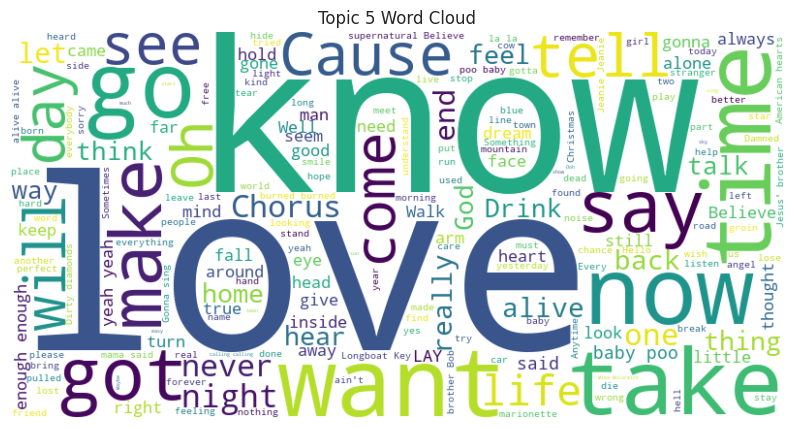

In [34]:
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation

# Create a word cloud for each topic based on lyrics
for topic_idx, topic in enumerate(lda.components_):
    # Get the indices of the top 100 words for the topic
    top_word_indices = topic.argsort()[:-101:-1]
    # Extract and concatenate the lyrics for the top words
    lyrics_for_topic = ' '.join([lyrics['text'].iloc[i] for i in top_word_indices])
    
    # Generate word cloud for the lyrics
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lyrics_for_topic)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()

### Explanation
    
- Word Clouds: Word clouds visualize the frequency of words in a corpus by representing each word's size proportional to its frequency. They provide a visual summary of the most common words but may not capture the underlying structure or coherence of the topics. Word clouds are often used for exploratory analysis and general visualization rather than precise topic modeling.

- Top Words from LDA: The top words extracted from LDA represent the words that have the highest probability of belonging to each topic. These words are selected based on their occurrence in the documents and their association with the underlying topic distribution. They aim to capture the most salient words that distinguish one topic from another.

## Emotion classification with HuggingFace

We are using this model : https://huggingface.co/SamLowe/roberta-base-go_emotions

In [35]:
from transformers import pipeline

# Define the maximum sequence length for the model
max_sequence_length = 512

# Initialize the pipeline for text classification
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

# Initialize an empty list to store the results
results = []

# Process each text entry individually
total_entries = len(lyrics["text"])
for i, text in enumerate(lyrics["text"], 1):
    # Truncate or split the text if it exceeds the maximum sequence length
    if len(text) > max_sequence_length:
        # Truncate the text
        text = text[:max_sequence_length]
    # Tokenize and classify the text
    model_output = classifier(text)
    
    # Append the result to the list
    results.append(model_output)
    
    # Print progress
    print(f"Processed {i}/{total_entries} entries")

# Now you have the results for each text entry stored in the 'results' list
# You can save it to a file or process it further as needed
# For example, you can add it as a new column to your DataFrame:
lyrics["classification_result"] = results

# Save the DataFrame with the classification results to a new CSV file
lyrics.to_csv("classified_dataset.csv", index=False)

/home/ziraax/code/Python/spotifyData2/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Processed 1/57650 entries
Processed 2/57650 entries
Processed 3/57650 entries
Processed 4/57650 entries
Processed 5/57650 entries
Processed 6/57650 entries
Processed 7/57650 entries
Processed 8/57650 entries
Processed 9/57650 entries
Processed 10/57650 entries
Processed 11/57650 entries
Processed 12/57650 entries
Processed 13/57650 entries
Processed 14/57650 entries
Processed 15/57650 entries


KeyboardInterrupt: 

In [ ]:
lyrics.head()

artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  sentiment_score  \
0  Look at her face, it's a wonderful face  \nAnd...           0.9587   
1  Take it easy with me, please  \nTouch me gentl...           0.9877   
2  I'll never know why I had to go  \nWhy I had t...           0.9986   
3  Making somebody happy is a question of give an...           0.9971   
4  Making somebody happy is a question of give an...           0.9974   

  sentiment                              classification_result  
0  Positive  [[{'label': 'admiration', 'score': 0.841130018...  
1  Positive  [[{'label': 'neutral', 'score': 0.727497637271...  
2  Positive  [[{'label': 'love', 'score': 0.398651599884033...  
3  Positive  [[{'label': 'neutral', 'score': 0.456762820482...  
4  Positive  [[{'label': 'neutral', 'score': 0.478631585836...

In [ ]:
lyrics["classification_result"][9]

[[{'label': 'sadness', 'score': 0.8110044002532959},
  {'label': 'disappointment', 'score': 0.12127958238124847},
  {'label': 'realization', 'score': 0.11400317400693893},
  {'label': 'neutral', 'score': 0.09242425113916397},
  {'label': 'nervousness', 'score': 0.08134035021066666},
  {'label': 'fear', 'score': 0.0740668773651123},
  {'label': 'grief', 'score': 0.05660754069685936},
  {'label': 'surprise', 'score': 0.05278228223323822},
  {'label': 'approval', 'score': 0.0283221248537302},
  {'label': 'annoyance', 'score': 0.021712200716137886},
  {'label': 'desire', 'score': 0.020922435447573662},
  {'label': 'joy', 'score': 0.016984036192297935},
  {'label': 'excitement', 'score': 0.01353610772639513},
  {'label': 'love', 'score': 0.012775626964867115},
  {'label': 'curiosity', 'score': 0.011957148090004921},
  {'label': 'relief', 'score': 0.009590731002390385},
  {'label': 'caring', 'score': 0.009314882569015026},
  {'label': 'anger', 'score': 0.008255161345005035},
  {'label': 'opt

In [ ]:
import json

# Function to extract label scores from the JSON
def extract_label_scores(json_str):
    # Replace single quotes with double quotes
    json_str = json_str.replace("'", "\"")
    labels = json.loads(json_str)[0]  # Assuming there's always only one list in the JSON
    scores = {label['label']: label['score'] for label in labels}
    return scores

# Convert lists to strings in the classification_result column
lyrics['classification_result'] = lyrics['classification_result'].apply(json.dumps)

# Apply the function to each row in the classification_result column
label_scores_df = lyrics['classification_result'].apply(extract_label_scores).apply(pd.Series)

# Concatenate the extracted label scores with the original dataframe
df_with_labels = pd.concat([lyrics, label_scores_df], axis=1)


# Display the resulting dataframe
print(df_with_labels)




In [ ]:
df_with_labels.to_csv("classified_dataset_w_features.csv", index=False)

In [36]:
df_with_labels = pd.read_csv("classified_dataset_w_features.csv")

In [37]:
df_with_labels.head()

artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  sentiment_score  \
0  Look at her face, it's a wonderful face  \nAnd...           0.9587   
1  Take it easy with me, please  \nTouch me gentl...           0.9877   
2  I'll never know why I had to go  \nWhy I had t...           0.9986   
3  Making somebody happy is a question of give an...           0.9971   
4  Making somebody happy is a question of give an...           0.9974   

  sentiment                              classification_result  admiration  \
0  Positive  [[{"label": "admiration", "score": 0.841130018...    0.841130   
1  Positive  [[{"label": "neutral", "score": 0.727497637271...    0.010303   
2  Positive  [[{"label": "love", "score": 0.398651599884033...    0.017694   
3  Positive  [[{"label": "neutral", "score": 0.456762820482...    0.027573   
4  Positive  [[{"label": "neutral", "score": 0.478631585836...    0.023839   

   curiosity  approval  ...     pride     anger  amusement  nervousness  \
0   0.191197  0.112592  ...  0.002149  0.002068   0.001830     0.001431   
1   0.002758  0.097061  ...  0.000833  0.002373   0.001473     0.000728   
2   0.007199  0.184142  ...  0.002677  0.012873   0.000890     0.026899   
3   0.005868  0.281040  ...  0.001999  0.001680   0.002593     0.000875   
4   0.006111  0.268559  ...  0.001830  0.001561   0.002446     0.000848   

     relief     grief   remorse   disgust  gratitude  embarrassment  
0  0.001291  0.001212  0.000852  0.000832   0.000788       0.000637  
1  0.001413  0.000564  0.000567  0.000696   0.000918       0.000250  
2  0.008113  0.008491  0.018574  0.003623   0.001162       0.005218  
3  0.003032  0.000462  0.000333  0.000489   0.000393       0.000248  
4  0.003064  0.000488  0.000364  0.000482   0.000413       0.000241  

[5 rows x 35 columns]

### Let's deep dive into emotion analysis

In [38]:
df_with_labels.dtypes

artist                    object
song                      object
link                      object
text                      object
sentiment_score          float64
sentiment                 object
classification_result     object
admiration               float64
curiosity                float64
approval                 float64
love                     float64
confusion                float64
neutral                  float64
excitement               float64
surprise                 float64
joy                      float64
optimism                 float64
realization              float64
disappointment           float64
sadness                  float64
caring                   float64
disapproval              float64
annoyance                float64
desire                   float64
fear                     float64
pride                    float64
anger                    float64
amusement                float64
nervousness              float64
relief                   float64
grief     

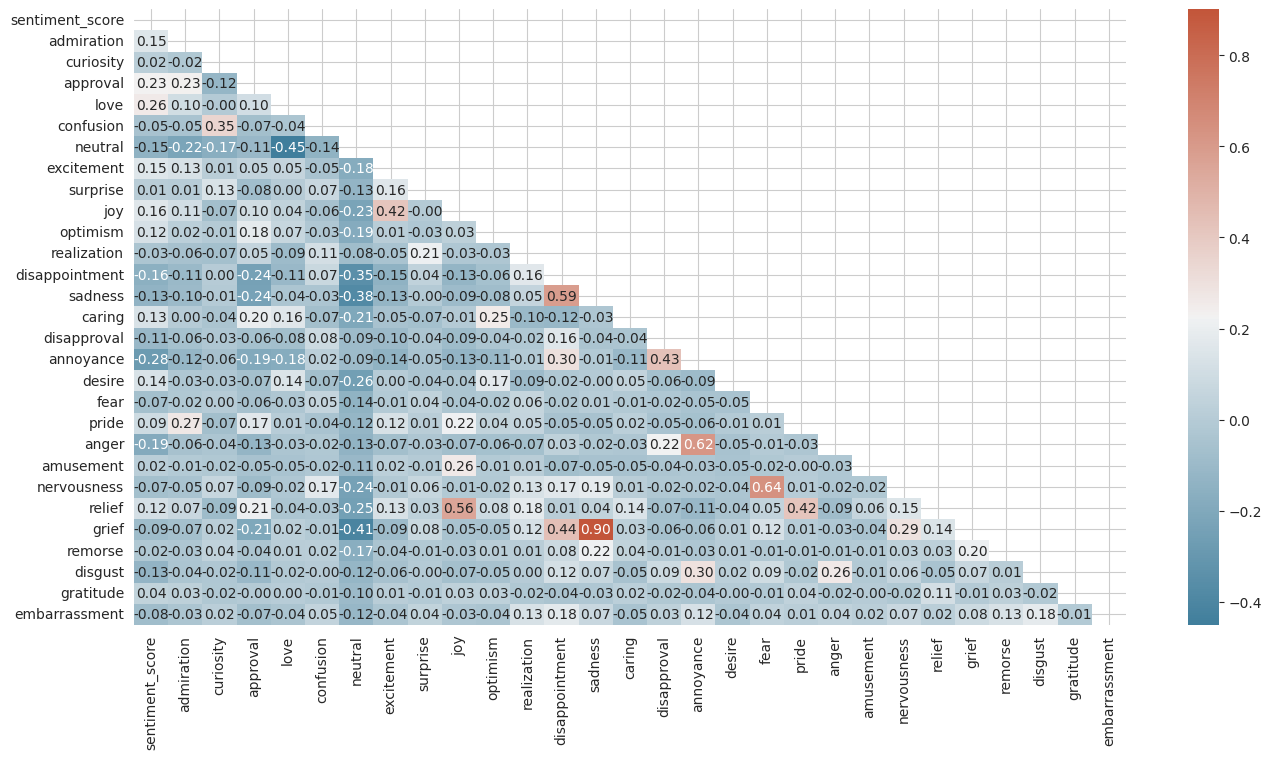

In [39]:
# Select only the numerical columns from your DataFrame
numerical_columns = df_with_labels.select_dtypes(include=np.number)

# Compute the correlation matrix
correlations = numerical_columns.corr()

# Set up the colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlations, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(16,8))
sns.heatmap(correlations, mask=mask, cmap=cmap, annot=True, fmt='.2f')
plt.show()


We extract outliers :

In [40]:
# Extract extreme correlation values
extreme_correlations = correlations[abs(correlations) >= 0.3].stack().reset_index()
extreme_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter out perfect correlations (same feature) and redundant correlations
extreme_correlations = extreme_correlations.loc[extreme_correlations['Feature 1'] < extreme_correlations['Feature 2']]

# Create DataFrame for extreme correlations
extreme_correlations_df = pd.DataFrame(extreme_correlations)

# Display extreme correlations DataFrame
print("Highly correlated features:")
extreme_correlations_df.sort_values(by='Correlation', ascending=False)

Highly correlated features:


Feature 1       Feature 2  Correlation
53           grief         sadness     0.901154
40            fear     nervousness     0.638243
43           anger       annoyance     0.617953
24  disappointment         sadness     0.586033
19             joy          relief     0.557283
26  disappointment           grief     0.444383
35       annoyance     disapproval     0.432865
42           pride          relief     0.419090
15      excitement             joy     0.416282
7        confusion       curiosity     0.351745
34       annoyance  disappointment     0.300318
22  disappointment         neutral    -0.347916
12         neutral         sadness    -0.380482
51           grief         neutral    -0.410200
6             love         neutral    -0.450787

### Classic descriptive statistics

In [41]:
# Select only the numerical columns from your DataFrame
numerical_columns = df_with_labels.select_dtypes(include=np.number)

# Compute descriptive statistics
descriptive_stats = numerical_columns.describe()

# Display descriptive statistics
print("Descriptive Statistics for Numerical Columns:")
descriptive_stats

Descriptive Statistics for Numerical Columns:


sentiment_score    admiration     curiosity      approval  \
count     57650.000000  57650.000000  57650.000000  57650.000000   
mean          0.354852      0.025763      0.036553      0.069396   
std           0.802769      0.089140      0.083240      0.084760   
min          -0.999900      0.000337      0.000239      0.003335   
25%          -0.597150      0.001592      0.002207      0.020700   
50%           0.885150      0.003233      0.004947      0.038484   
75%           0.982800      0.010089      0.024157      0.081581   
max           0.999900      0.962224      0.882771      0.881665   

               love     confusion       neutral    excitement      surprise  \
count  57650.000000  57650.000000  57650.000000  57650.000000  57650.000000   
mean       0.103900      0.030440      0.436150      0.016857      0.009836   
std        0.229575      0.090321      0.302376      0.050930      0.041841   
min        0.000139      0.000316      0.003566      0.000226      0.000188   
25%        0.000977      0.002161      0.152060      0.001377      0.000971   
50%        0.003161      0.004296      0.392768      0.003271      0.001989   
75%        0.035907      0.016421      0.718412      0.009788      0.004830   
max        0.978497      0.938861      0.968794      0.844724      0.861982   

                joy  ...         pride         anger     amusement  \
count  57650.000000  ...  57650.000000  57650.000000  57650.000000   
mean       0.028722  ...      0.001498      0.018876      0.014963   
std        0.086279  ...      0.005675      0.059930      0.074185   
min        0.000331  ...      0.000049      0.000366      0.000201   
25%        0.001911  ...      0.000370      0.002409      0.001468   
50%        0.004271  ...      0.000660      0.004694      0.002348   
75%        0.013174  ...      0.001311      0.010860      0.004149   
max        0.895166  ...      0.284189      0.865299      0.934356   

        nervousness        relief         grief       remorse       disgust  \
count  57650.000000  57650.000000  57650.000000  57650.000000  57650.000000   
mean       0.009195      0.002769      0.003291      0.006652      0.003493   
std        0.028711      0.005544      0.005335      0.039430      0.009878   
min        0.000071      0.000124      0.000115      0.000073      0.000268   
25%        0.000821      0.000710      0.000510      0.000389      0.001093   
50%        0.002093      0.001387      0.001118      0.000968      0.001908   
75%        0.006726      0.002728      0.003489      0.003041      0.003682   
max        0.654064      0.201704      0.064329      0.799119      0.824331   

          gratitude  embarrassment  
count  57650.000000   57650.000000  
mean       0.004317       0.003068  
std        0.046841       0.014634  
min        0.000034       0.000118  
25%        0.000233       0.000540  
50%        0.000389       0.001144  
75%        0.000840       0.002696  
max        0.991576       0.696549  

[8 rows x 29 columns]

In [42]:
mean_values = numerical_columns.mean()
median_values = numerical_columns.median()
std_deviation = numerical_columns.std()
min_values = numerical_columns.min()
max_values = numerical_columns.max()

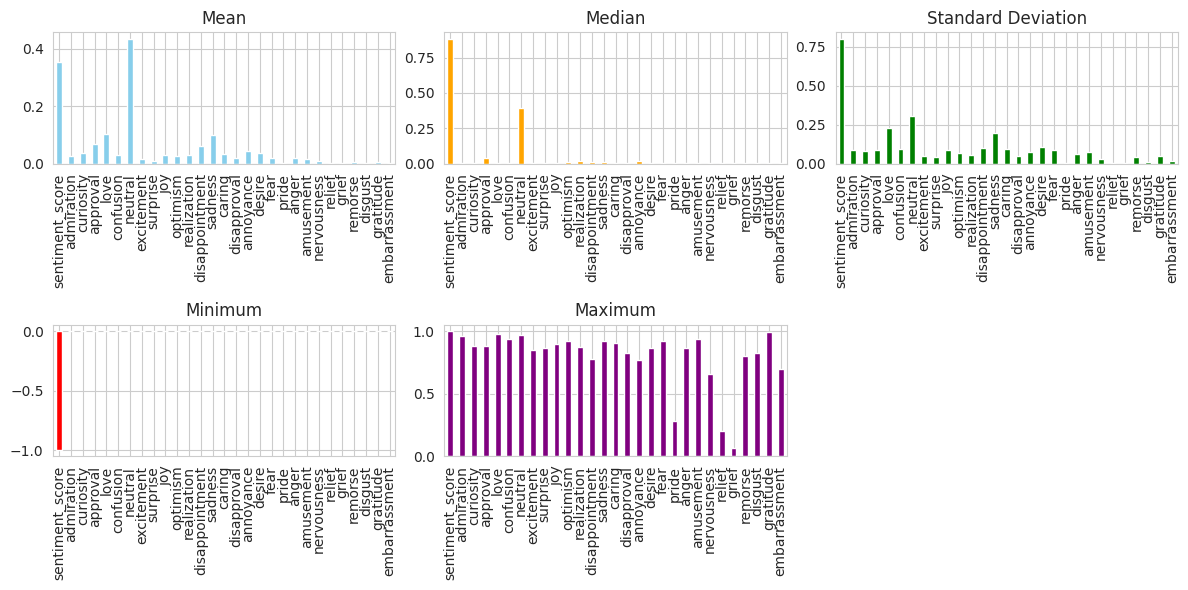

In [43]:
# Compute descriptive statistics
descriptive_stats = numerical_columns.describe()

# Transpose the dataframe for easier plotting
descriptive_stats = descriptive_stats.transpose()

# Plot descriptive statistics
plt.figure(figsize=(12, 6))

# Plot mean values
plt.subplot(2, 3, 1)
descriptive_stats['mean'].plot(kind='bar', color='skyblue')
plt.title('Mean')

# Plot median values
plt.subplot(2, 3, 2)
descriptive_stats['50%'].plot(kind='bar', color='orange')
plt.title('Median')

# Plot standard deviation values
plt.subplot(2, 3, 3)
descriptive_stats['std'].plot(kind='bar', color='green')
plt.title('Standard Deviation')

# Plot minimum values
plt.subplot(2, 3, 4)
descriptive_stats['min'].plot(kind='bar', color='red')
plt.title('Minimum')

# Plot maximum values
plt.subplot(2, 3, 5)
descriptive_stats['max'].plot(kind='bar', color='purple')
plt.title('Maximum')

plt.tight_layout()
plt.show()


#### Histograms and KDE

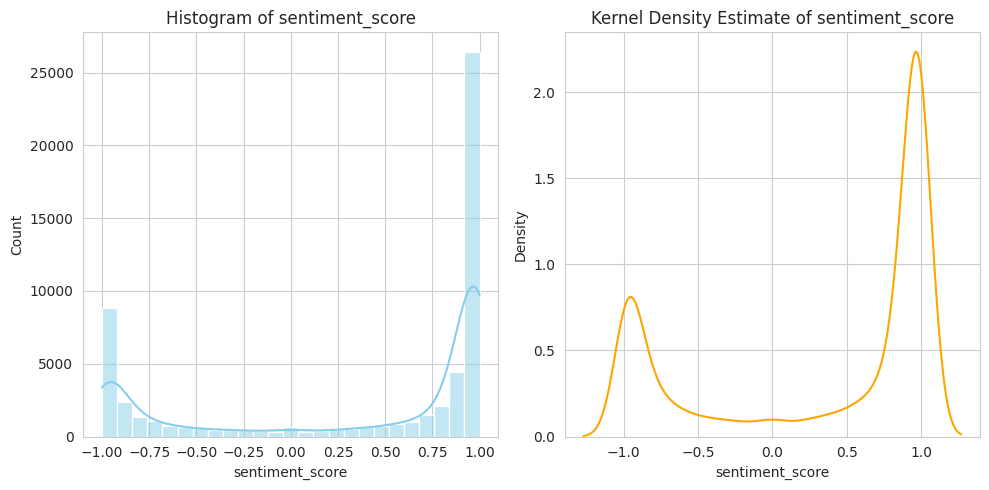

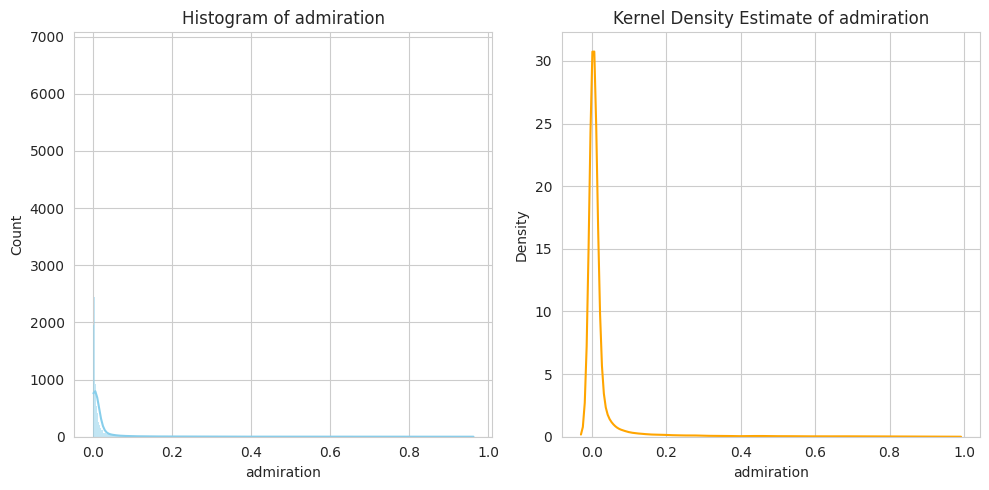

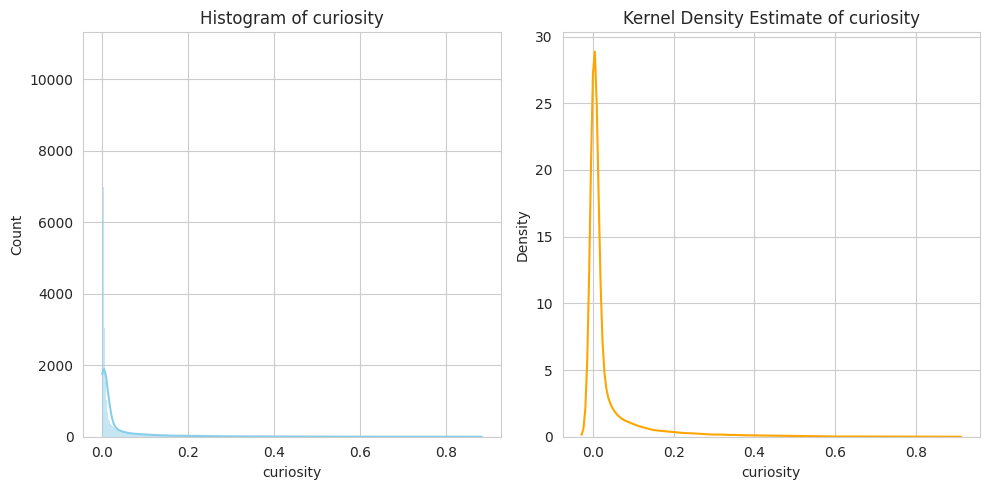

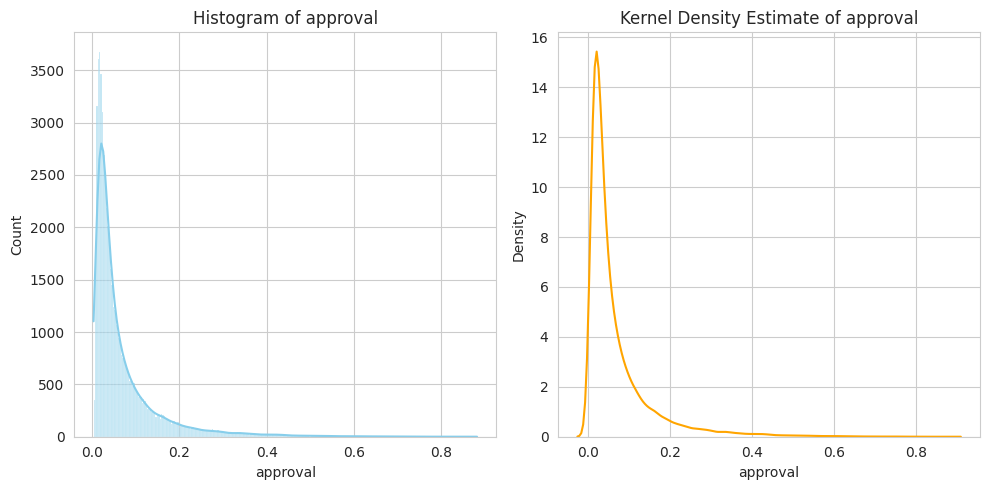

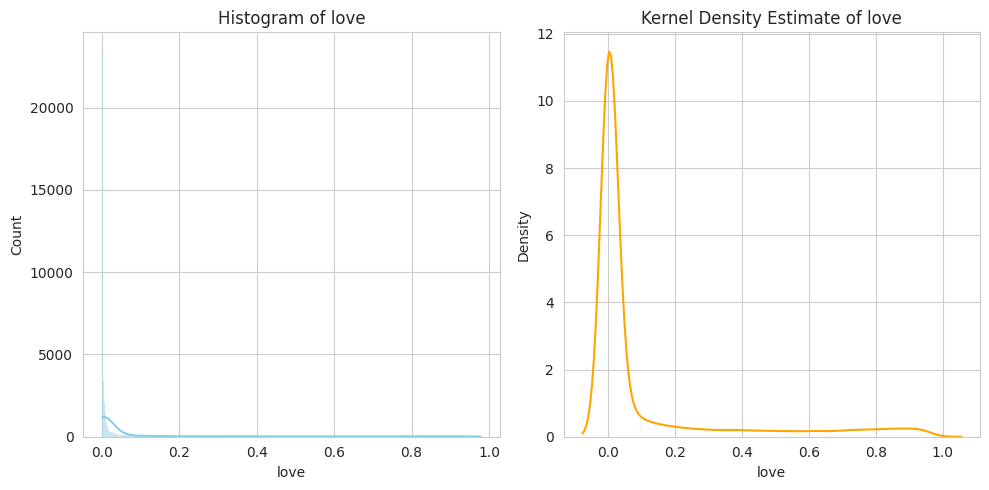

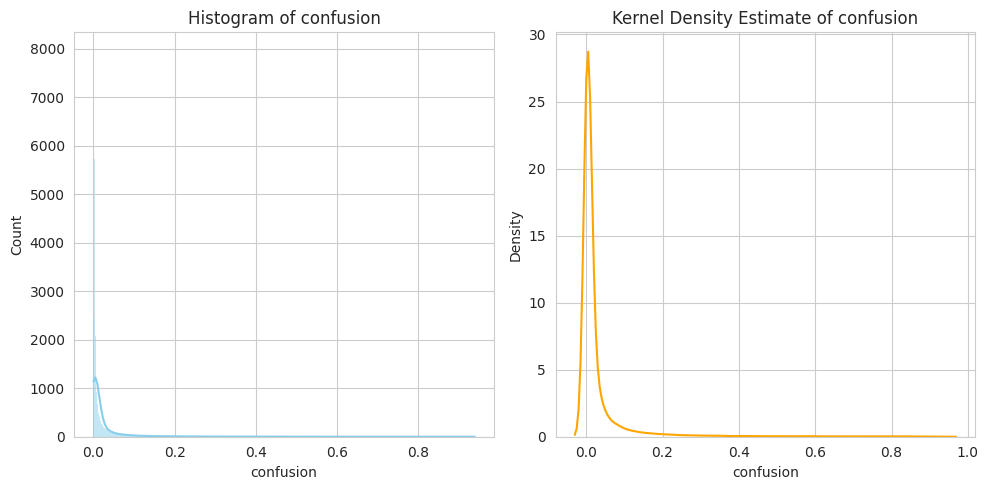

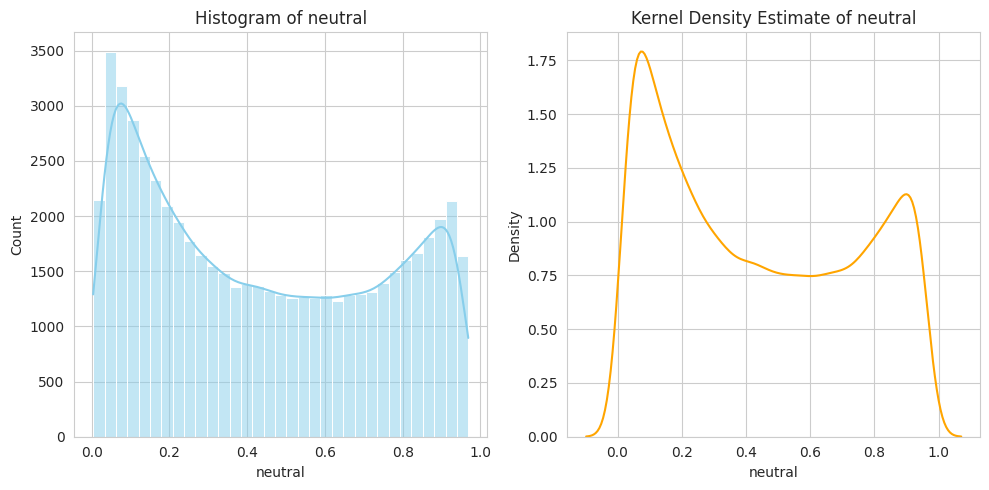

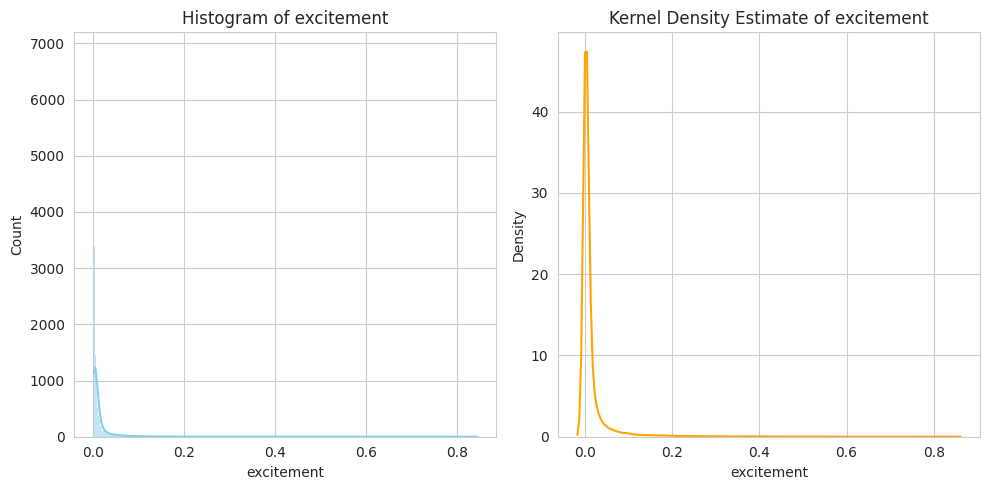

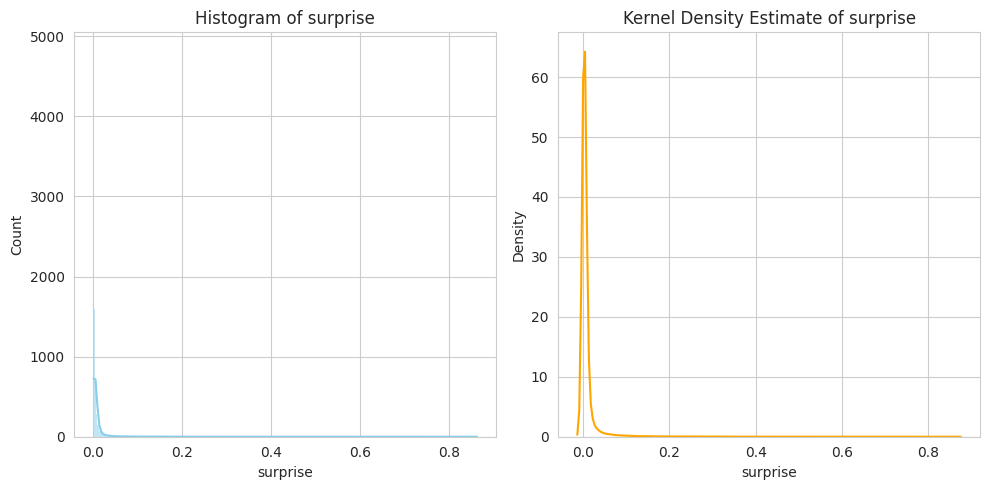

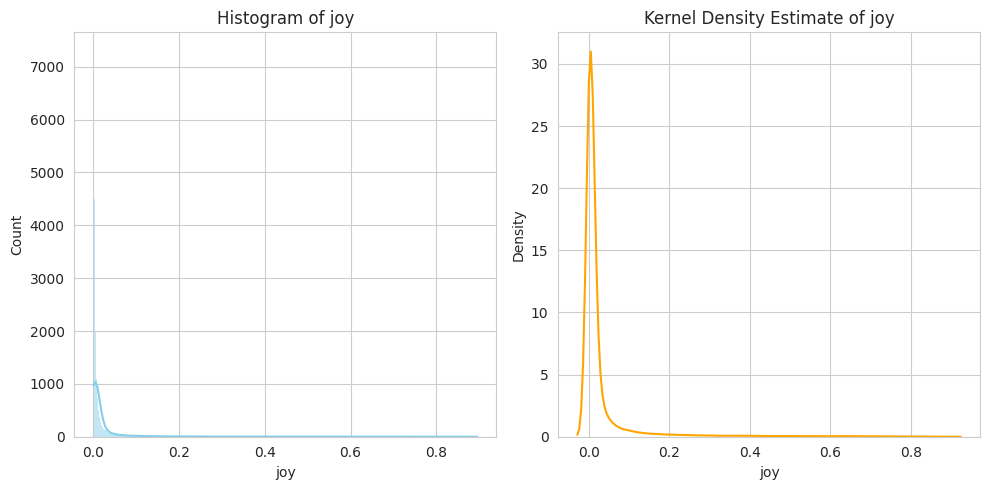

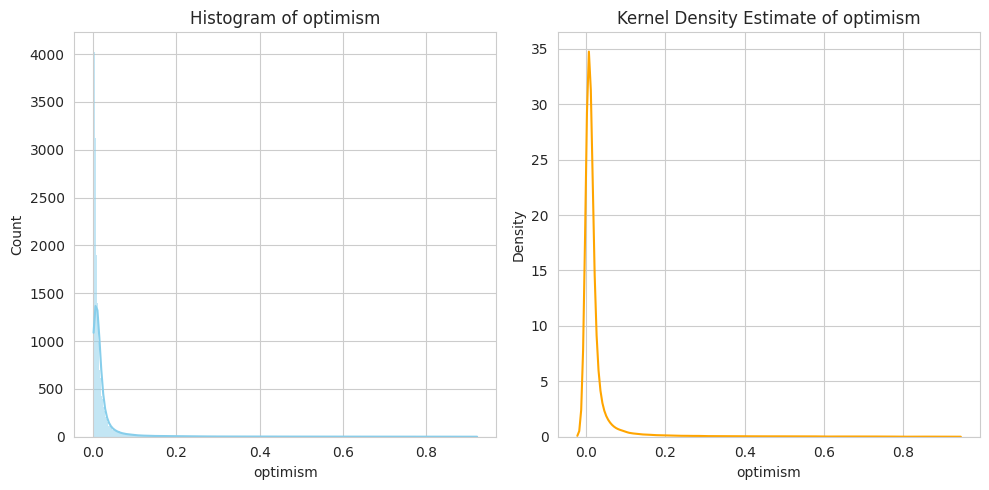

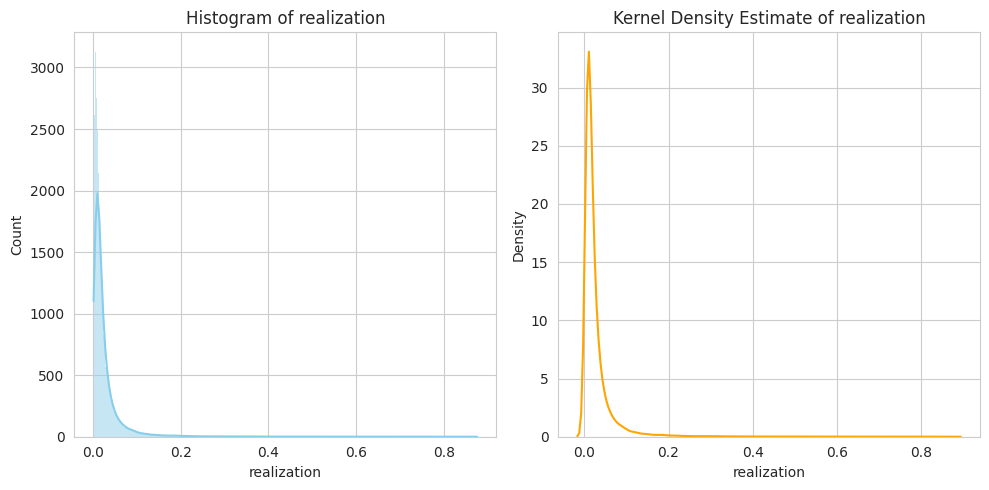

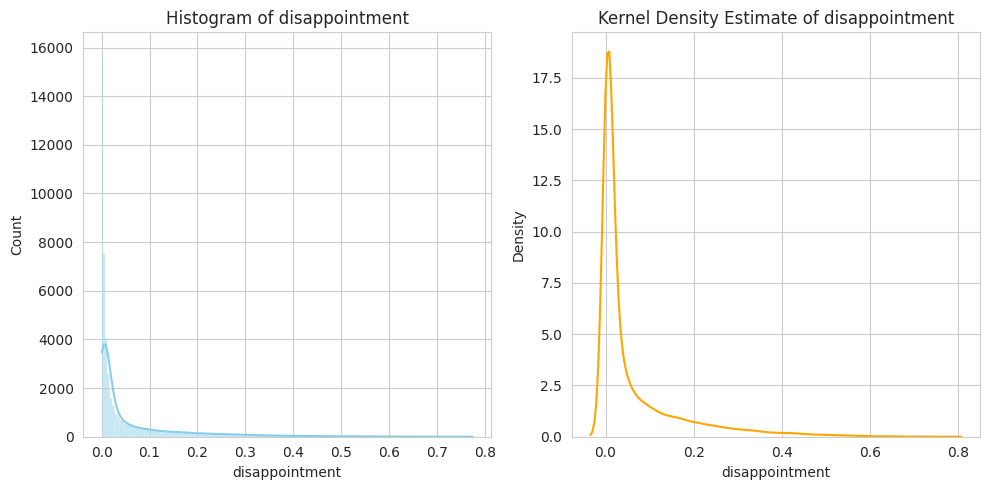

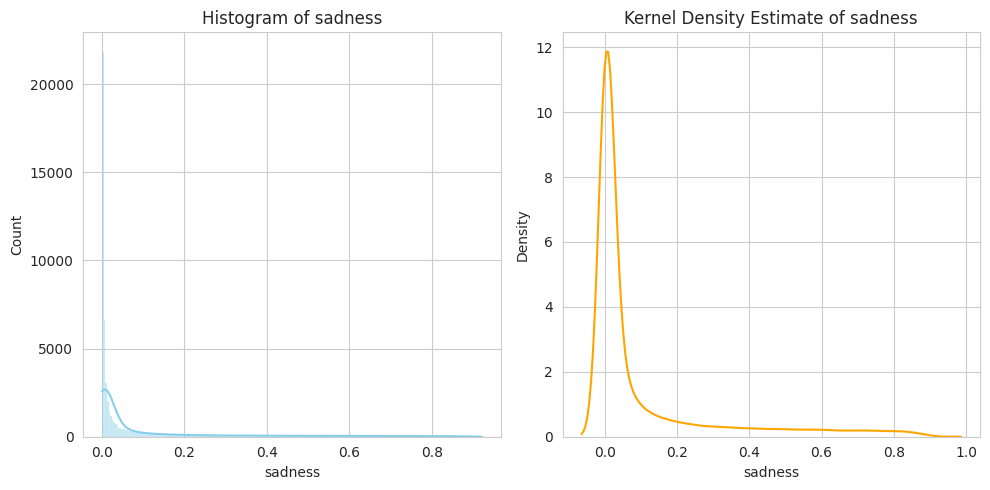

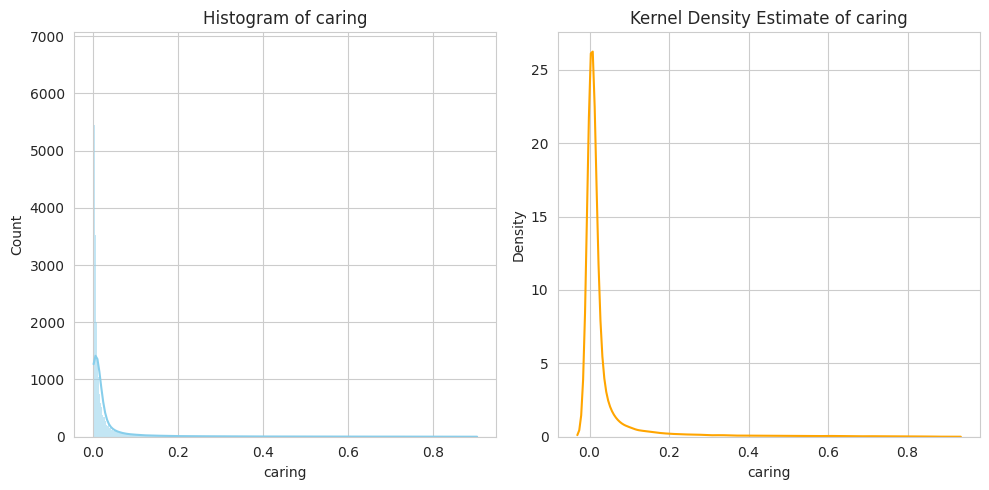

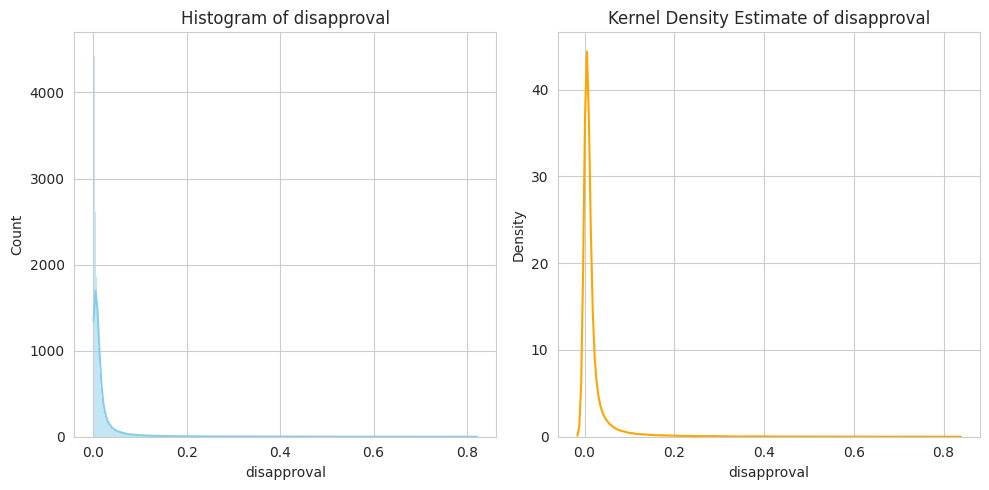

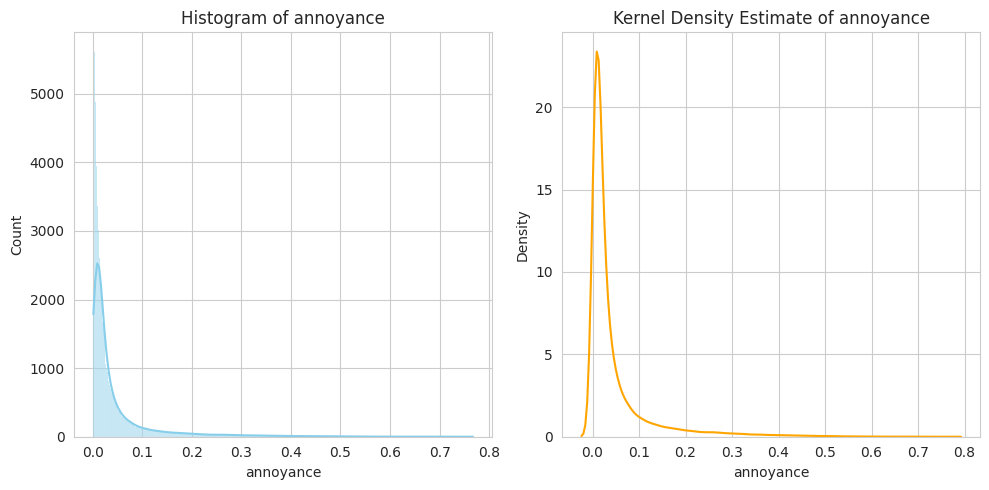

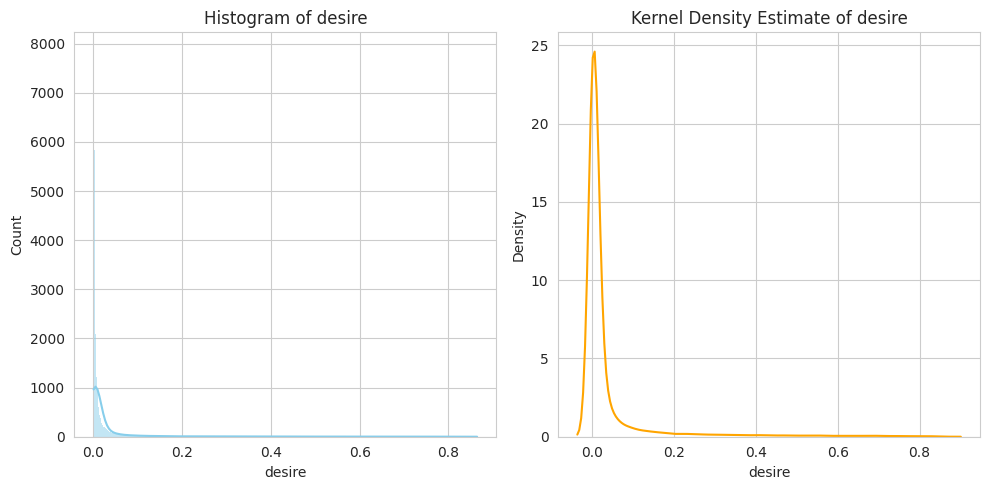

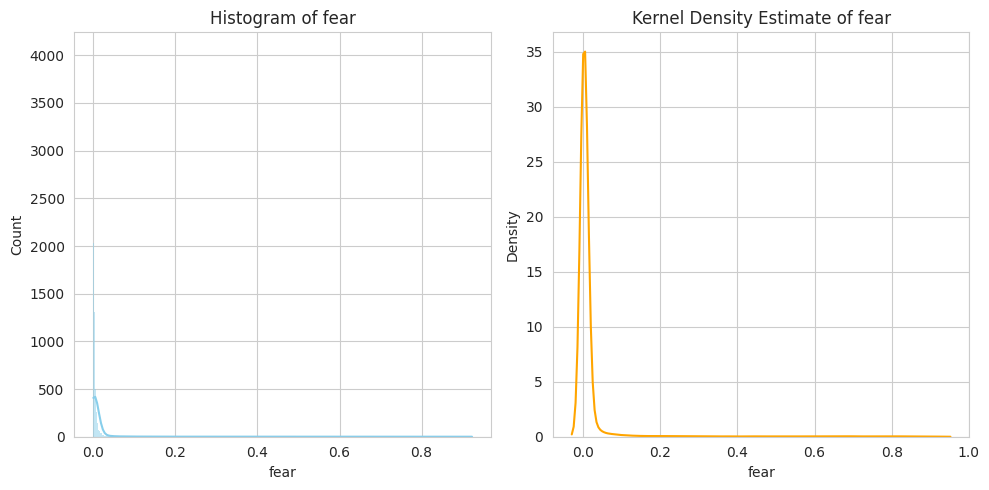

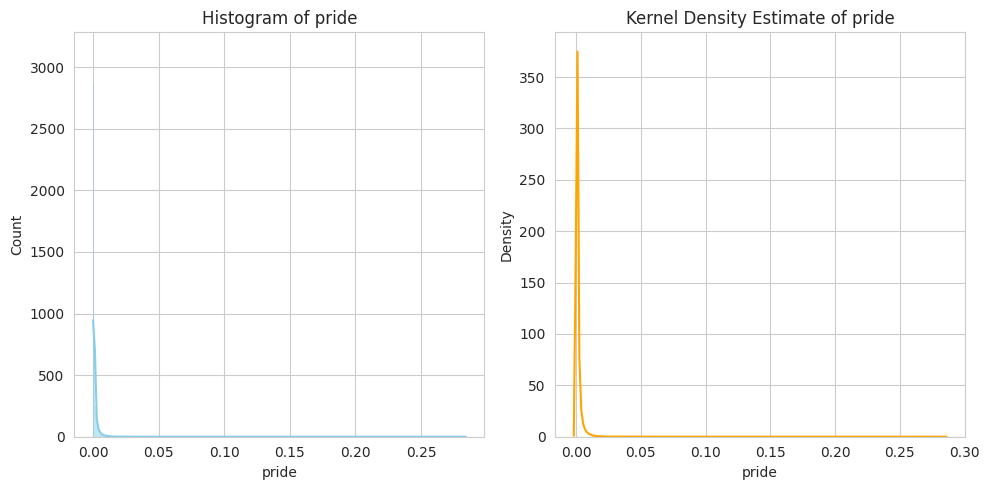

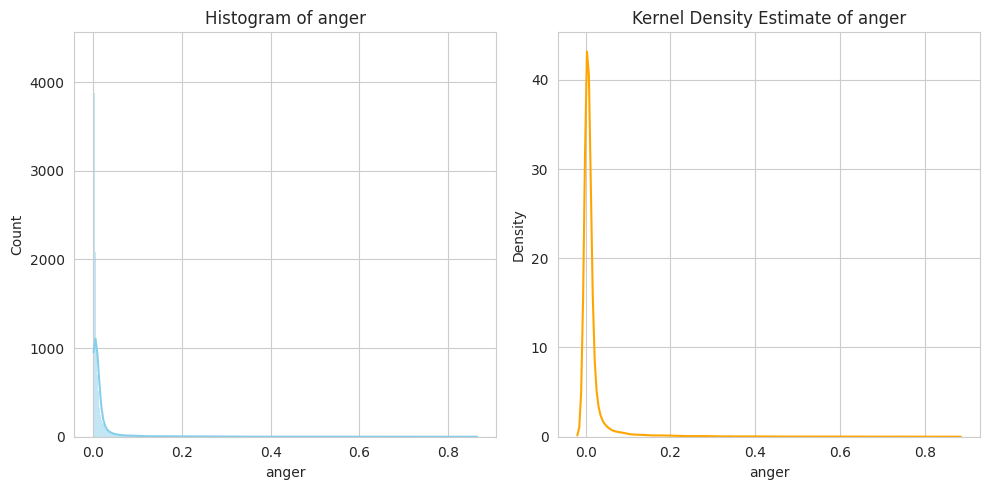

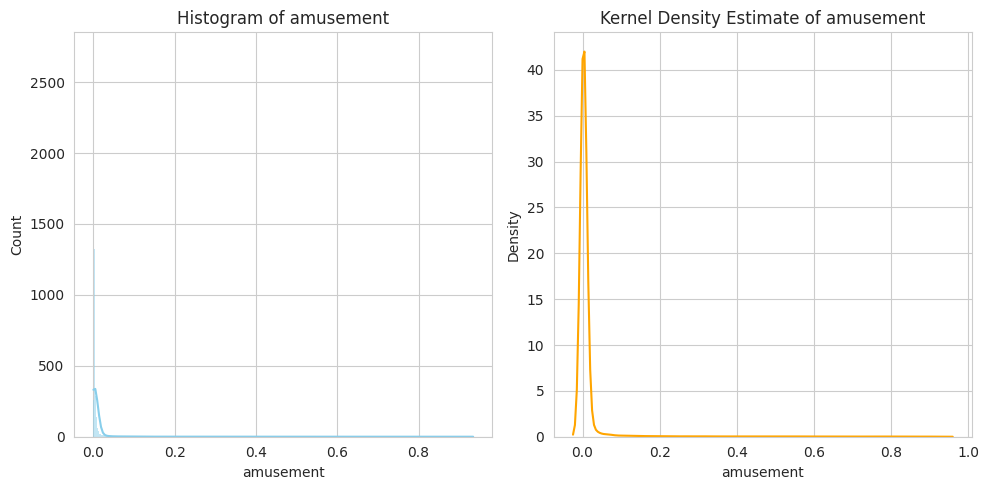

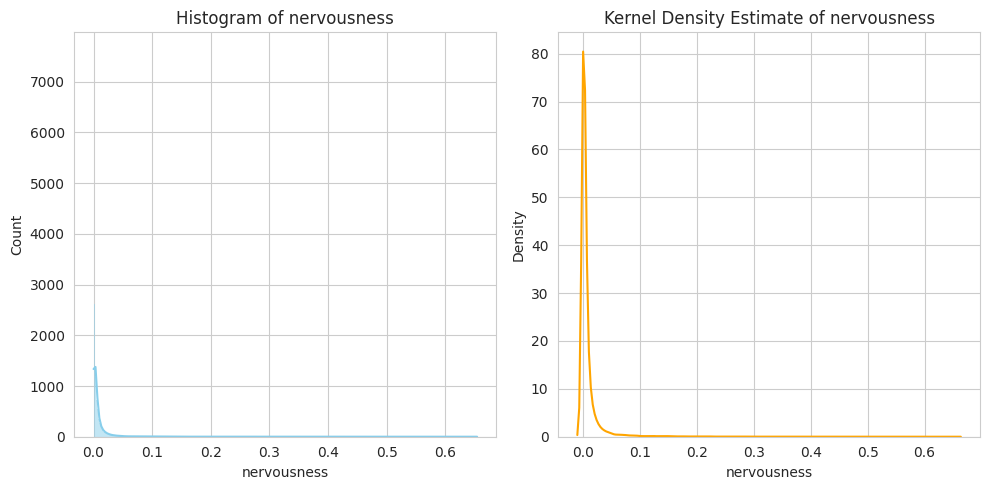

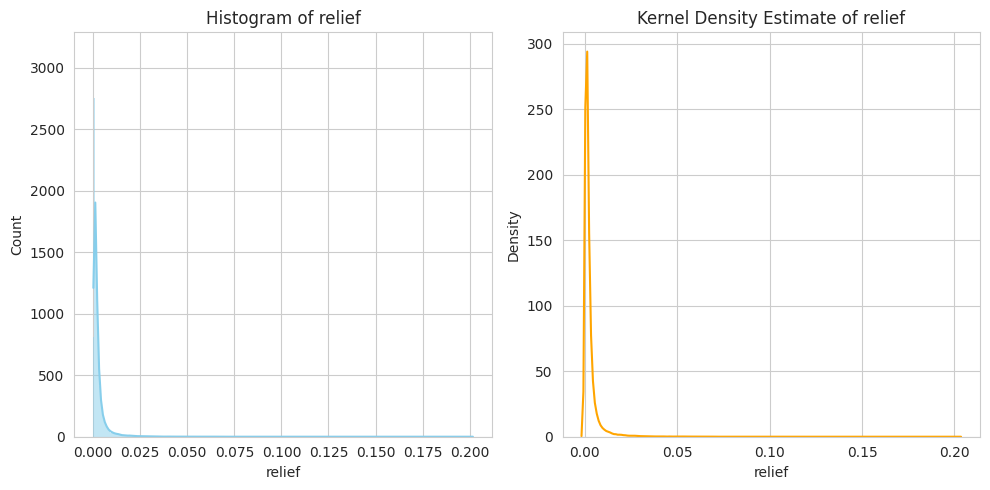

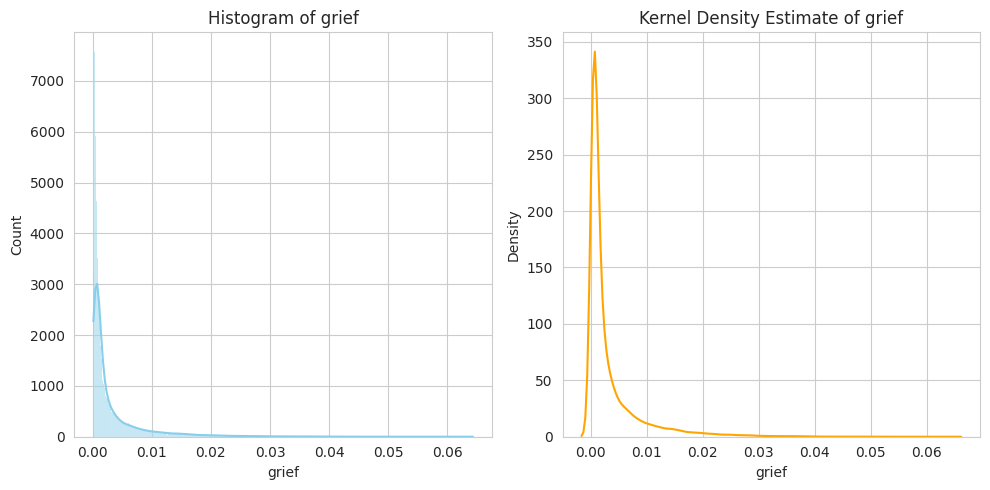

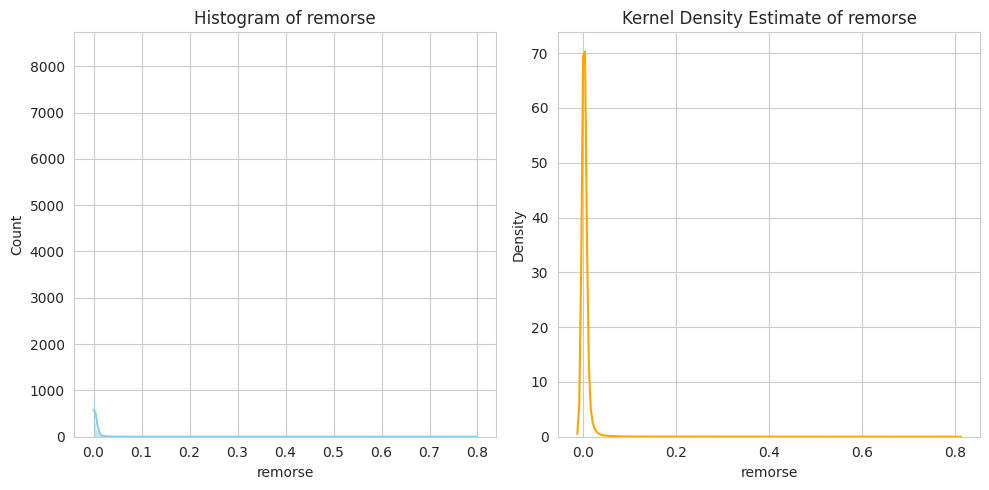

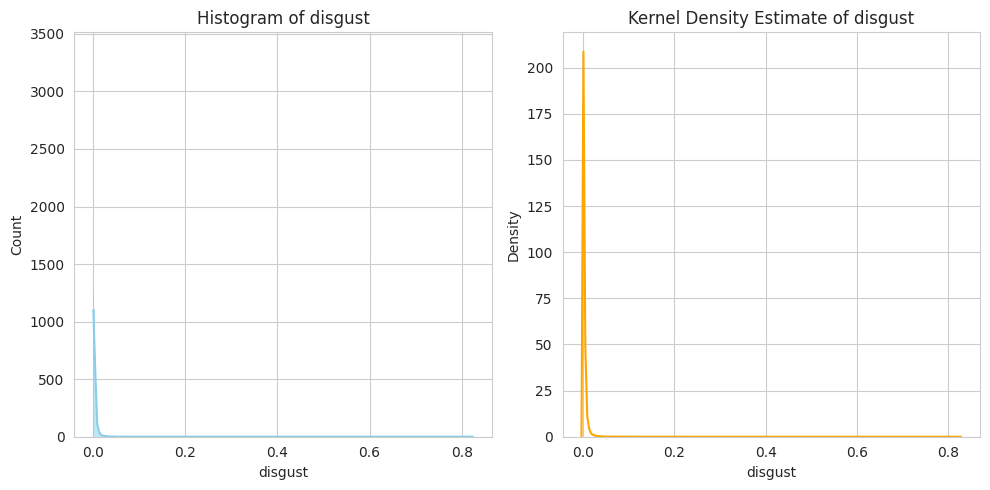

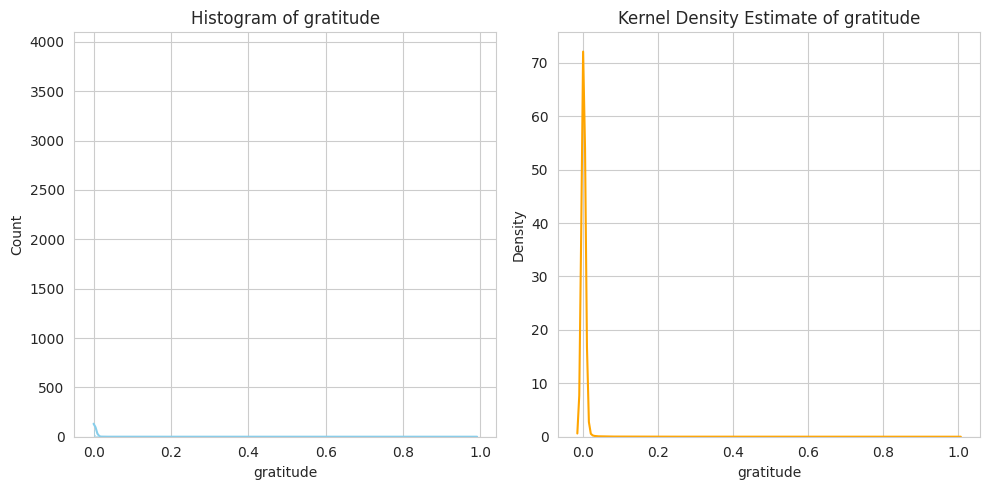

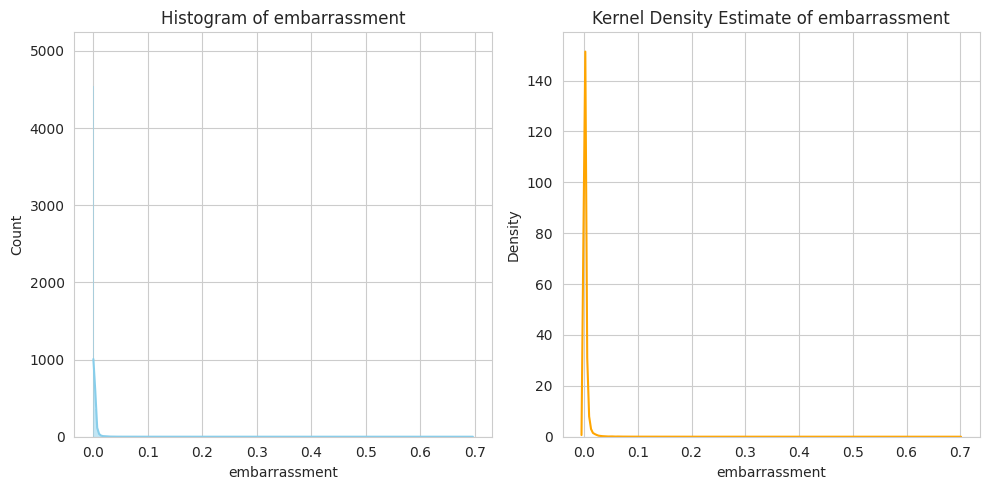

In [44]:
# Select only the numerical columns from your DataFrame
numerical_columns = df_with_labels.select_dtypes(include=np.number)

# Plot histograms and kernel density estimates for each numerical column
for col in numerical_columns.columns:
    plt.figure(figsize=(10, 5))
    
    # Plot histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_with_labels, x=col, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    
    # Plot kernel density estimate
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df_with_labels[col], color='orange')
    plt.title(f'Kernel Density Estimate of {col}')
    
    plt.tight_layout()
    plt.show()


TODO : Correlation entre positivité et les features

#### Let's extract outliers based on emotional attributes

In [50]:
# List of emotional attributes
emotional_attributes = ['admiration', 'curiosity', 'approval', 'love', 'confusion', 'neutral', 'excitement',
                        'surprise', 'joy', 'optimism', 'realization', 'disappointment', 'sadness', 'caring',
                        'disapproval', 'annoyance', 'desire', 'fear', 'pride', 'anger', 'amusement', 'nervousness',
                        'relief', 'grief', 'remorse', 'disgust', 'gratitude', 'embarrassment']

# Dictionary to store top 5 songs for each emotional attribute
top_songs = {}

# Iterate through each emotional attribute
for attribute in emotional_attributes:
    # Sort the dataframe by the current emotional attribute in descending order
    sorted_df = df_with_labels.sort_values(by=attribute, ascending=False)
    # Select the top 5 songs for the current emotional attribute
    top_songs[attribute] = sorted_df[['artist', 'song', attribute]].head(3)

# Print the top 5 songs for each emotional attribute
for attribute, songs_df in top_songs.items():
    print(f"Top 5 songs for {attribute}:")
    print(songs_df)
    print("\n")


Top 5 songs for admiration:
             artist                  song  admiration
25145  Bette Midler         I'm Beautiful    0.962224
22678      Zucchero  You Are So Beautiful    0.961779
20512  Van Morrison      Beautiful Vision    0.959436


Top 5 songs for curiosity:
                  artist                        song  curiosity
26475     Britney Spears              I'm So Curious   0.882771
30635  Dusty Springfield                I Am Curious   0.864252
42215    Louis Armstrong  When Did You Leave Heaven?   0.818887


Top 5 songs for approval:
            artist                 song  approval
50376  Ray Charles  Stella By Starlight  0.881665
43092     Maroon 5    As Things Collide  0.869778
12604  Matt Redman        History Maker  0.818425


Top 5 songs for love:
               artist              song      love
11579  Linda Ronstadt   Baby I Love You  0.978497
49975         Ramones  Baby, I Love You  0.976260
33121            Free       Love You So  0.975059


Top 5 songs for c

#### PCA & Clustering

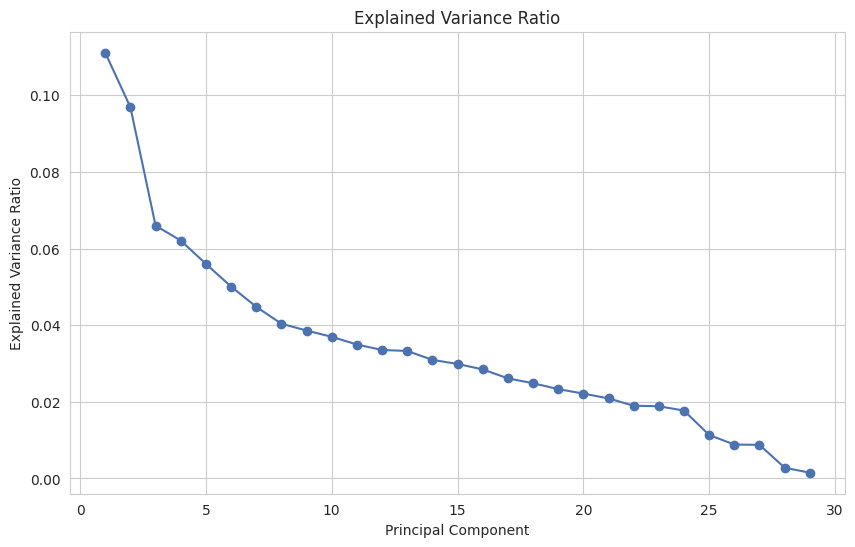

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numerical_features = df_with_labels.drop(['artist', 'song', 'link', 'text', 'sentiment', 'classification_result'], axis=1)

scaler = StandardScaler()
scaled_df = scaler.fit_transform(numerical_features)

pca = PCA()
pca.fit(scaled_df)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

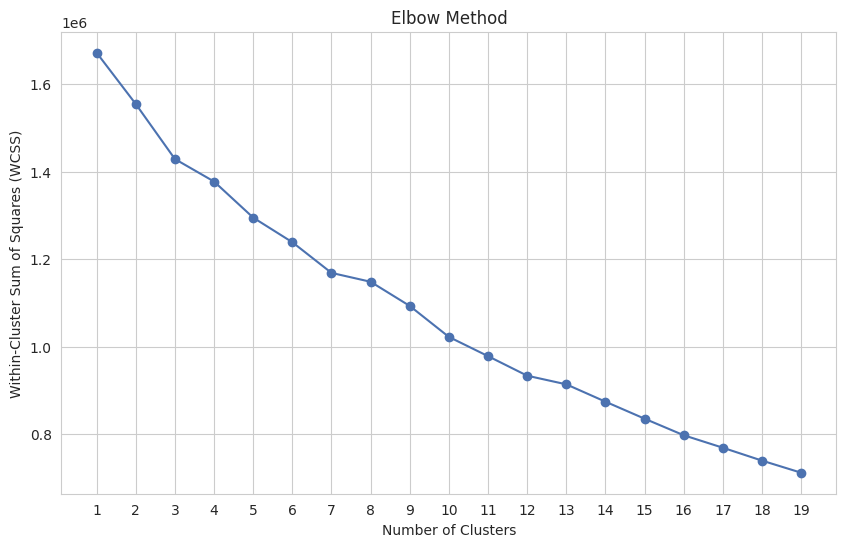

In [58]:
from sklearn.cluster import KMeans

# List to store the within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []

# Try different numbers of clusters from 1 to 10
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()


The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It can be computed mathematically as follows:

1. For each data point $i$, compute the following two distances:
   - $a(i)$: The average distance from $i$ to all other data points in the same cluster.
   - $b(i)$: The smallest average distance from $i$ to all data points in any other cluster, where $i$ is not a member.

2. The silhouette score $s(i)$ for each data point $i$ is given by:
   $$ s(i) = \frac{{b(i) - a(i)}}{{\max\{a(i), b(i)\}}} $$

3. The overall silhouette score is the average of all silhouette scores for all data points.

To break down the computation:

- $a(i)$ measures how close $i$ is to other points in its own cluster. It is the average distance between $i$ and all other points in the same cluster.
- $b(i)$ measures how well $i$ could belong to the closest neighboring cluster. It is the smallest average distance between $i$ and all points in a different cluster, calculated over all clusters except the one $i$ belongs to.
- $s(i)$ ranges from -1 to 1. A score close to 1 indicates that $i$ is well matched to its own cluster and poorly matched to neighboring clusters, while a score close to -1 indicates that $i$ is poorly matched to its own cluster and well matched to neighboring clusters.

In summary, the silhouette score provides a way to assess the quality of clustering in terms of both cohesion within clusters and separation between clusters. Higher silhouette scores indicate better clustering structures.


In [60]:
from sklearn.metrics import silhouette_score

# List to store silhouette scores for different numbers of clusters
silhouette_scores = []

# Try different numbers of clusters from 2 to 20
for num_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters based on the highest silhouette score
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because we started from 2 clusters
print("Optimal number of clusters:", optimal_num_clusters)


Optimal number of clusters: 19


In [ ]:
# Number of clusters
num_clusters = 19  # You can adjust this number based on your specific requirements

# Fit K-means clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
df_with_labels['cluster'] = cluster_labels

# Print the count of songs in each cluster
print("Count of songs in each cluster:")
print(df_with_labels['cluster'].value_counts())

for cluster_id in range(num_clusters):
    print(f"\nCluster {cluster_id}:")
    print(df_with_labels[df_with_labels['cluster'] == cluster_id].head())



Cluster 0:
Number of songs: 6708


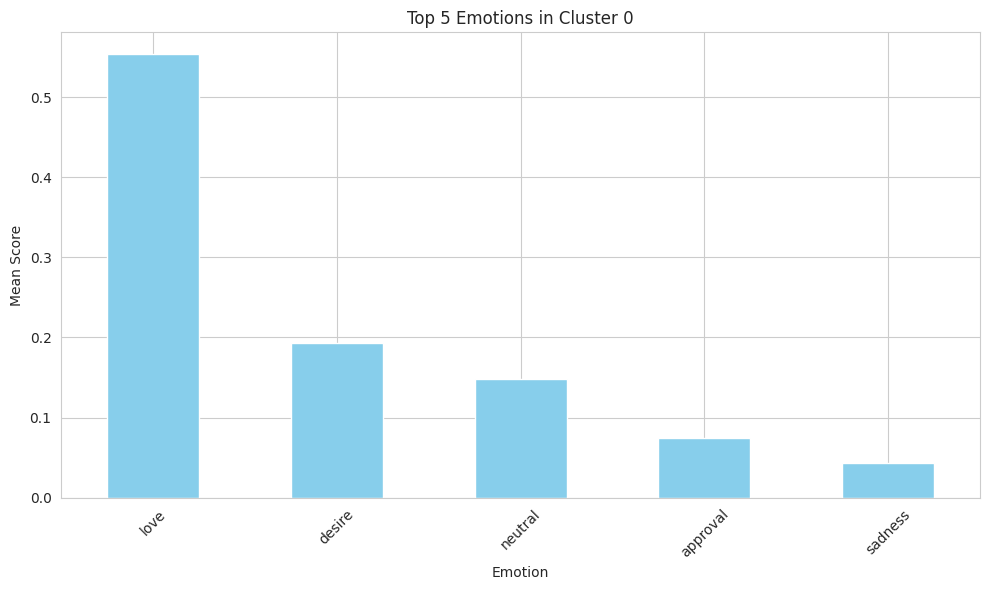


Cluster 1:
Number of songs: 5291


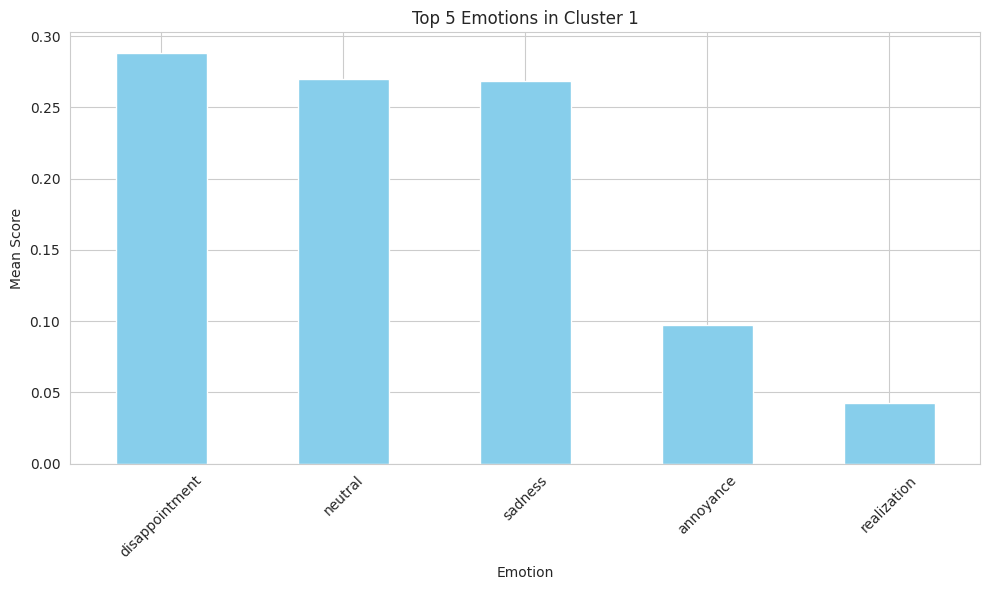


Cluster 2:
Number of songs: 23211


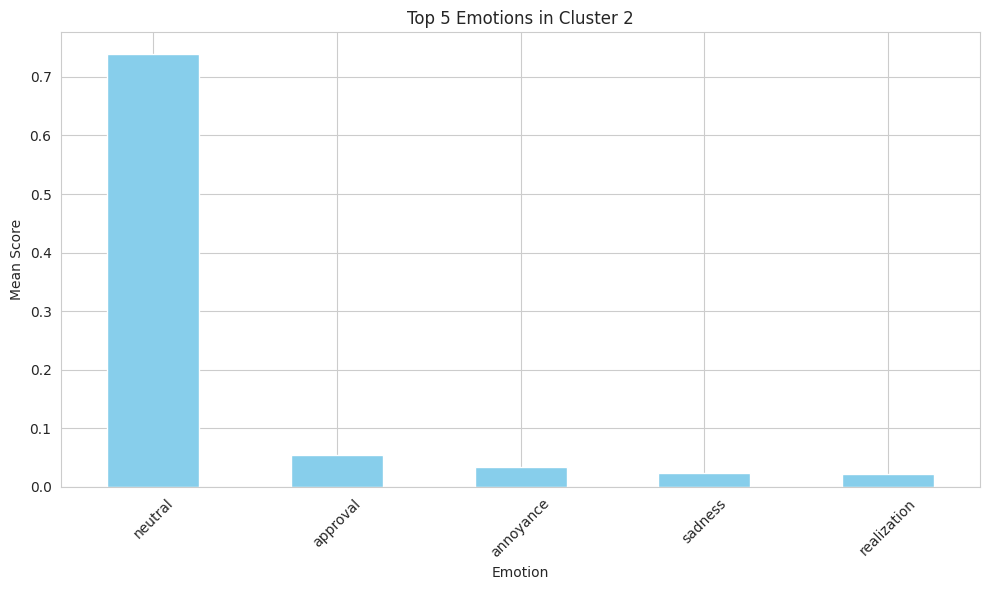


Cluster 3:
Number of songs: 17


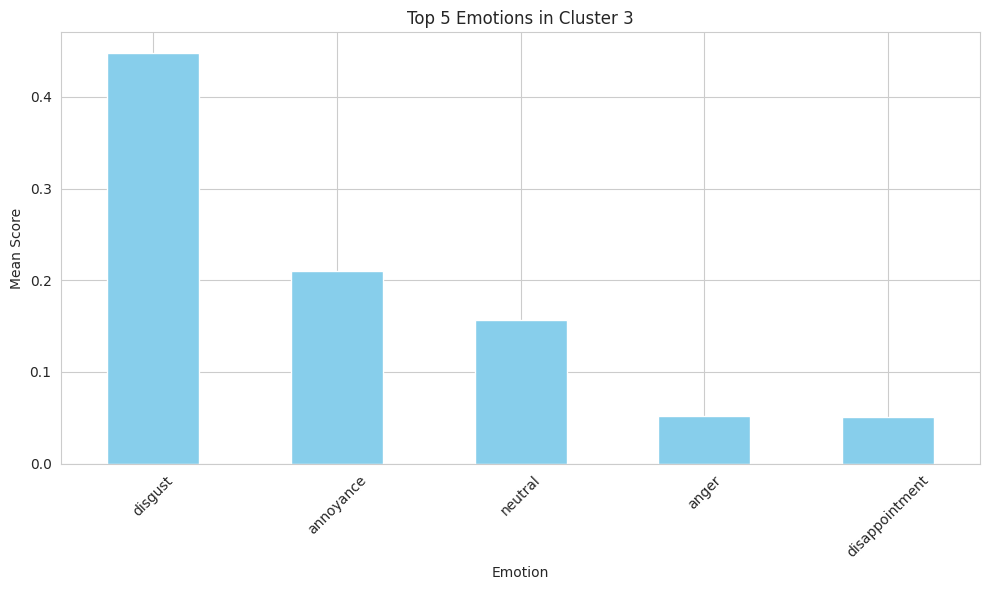


Cluster 4:
Number of songs: 1259


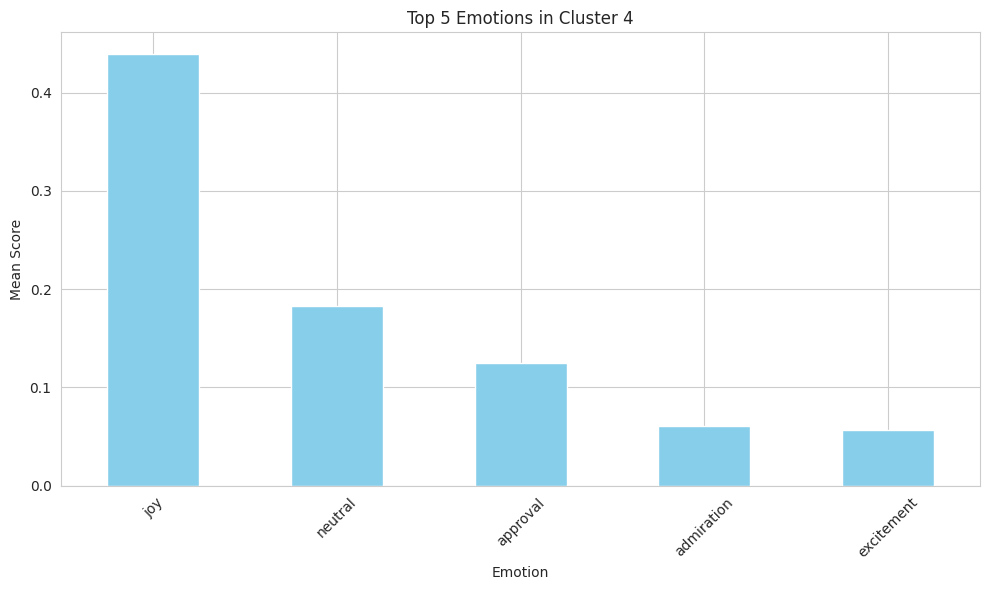


Cluster 5:
Number of songs: 4441


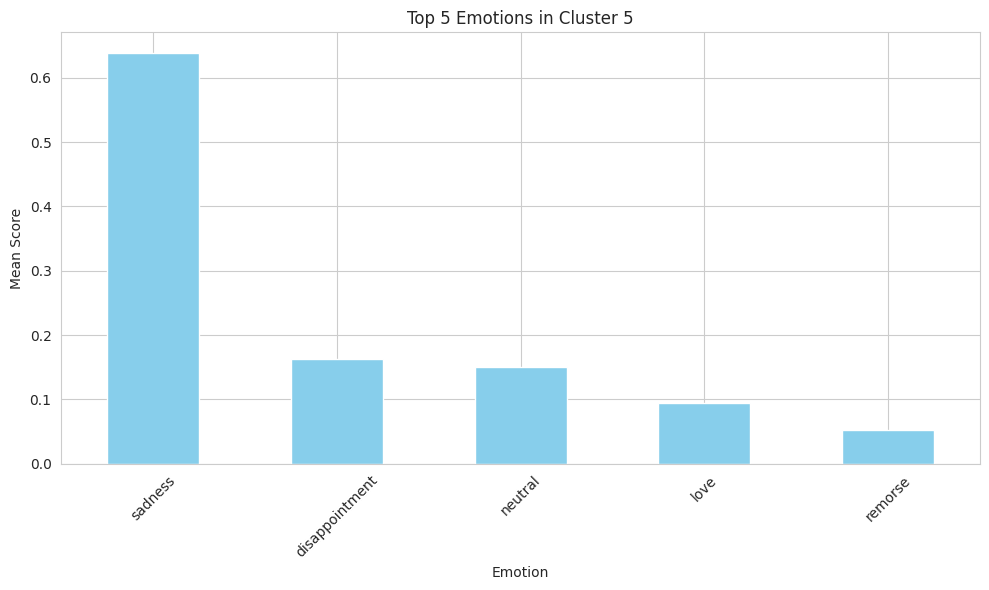


Cluster 6:
Number of songs: 1634


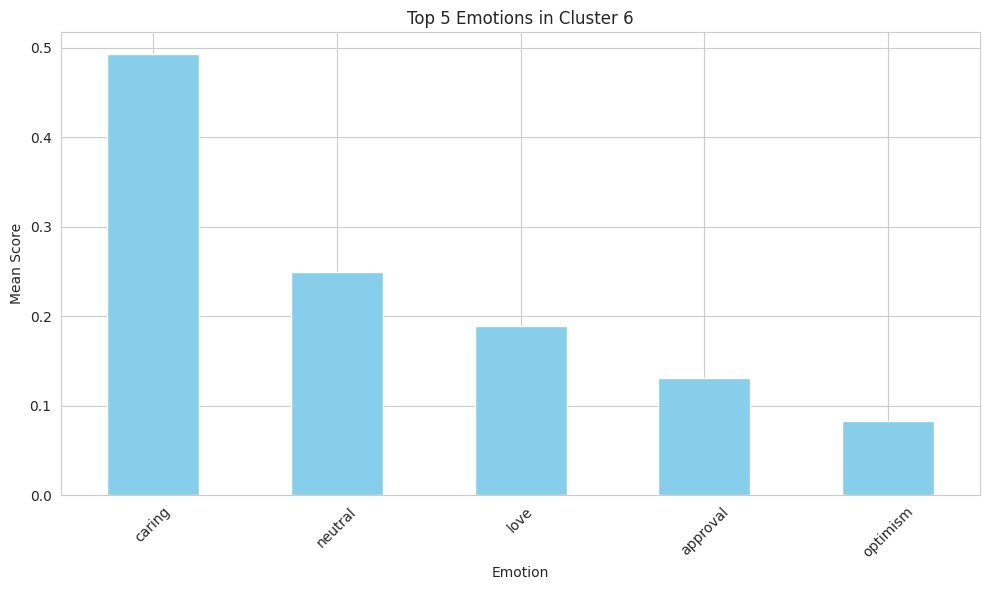


Cluster 7:
Number of songs: 212


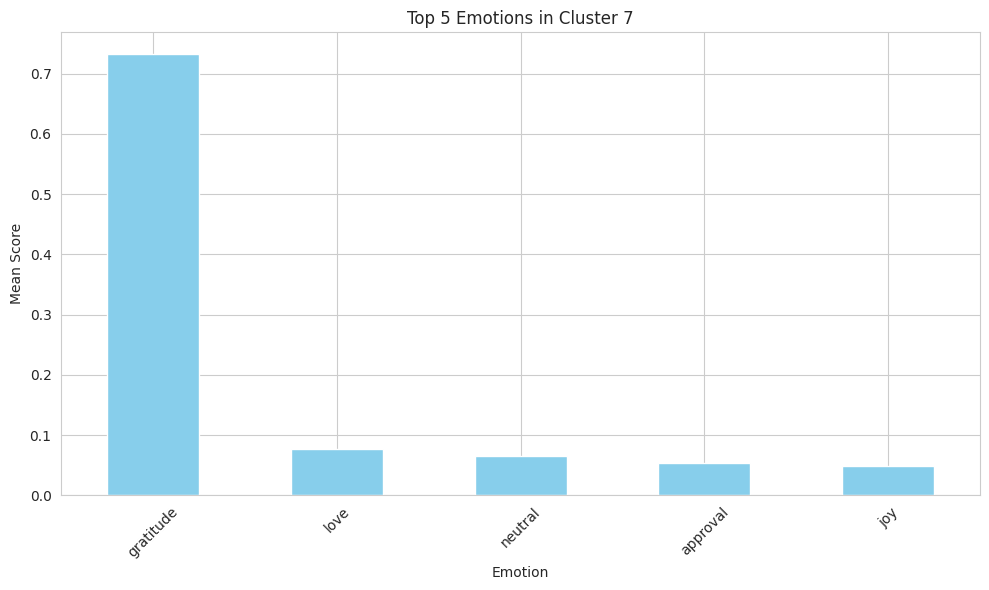


Cluster 8:
Number of songs: 3227


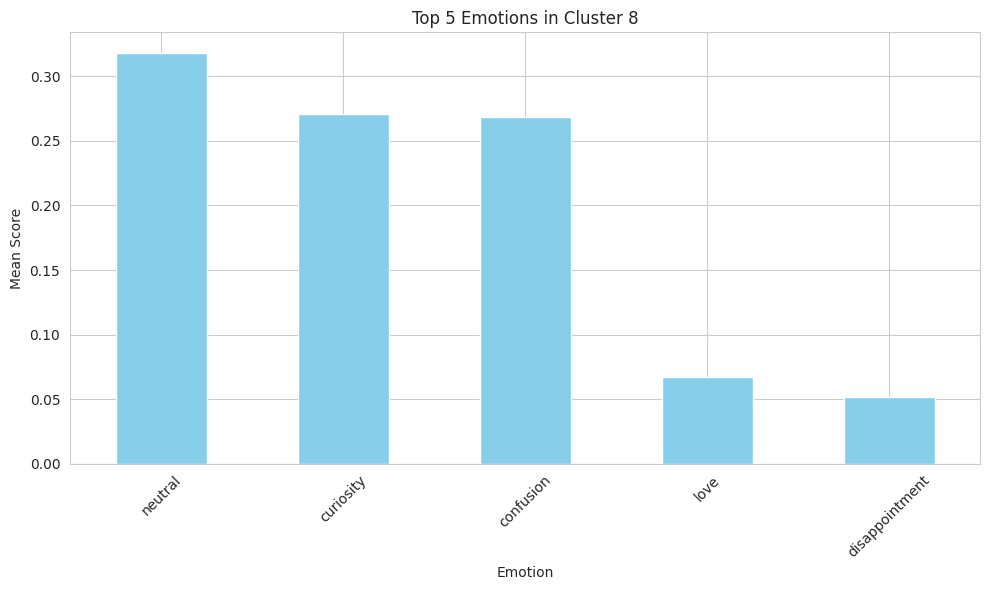


Cluster 9:
Number of songs: 1117


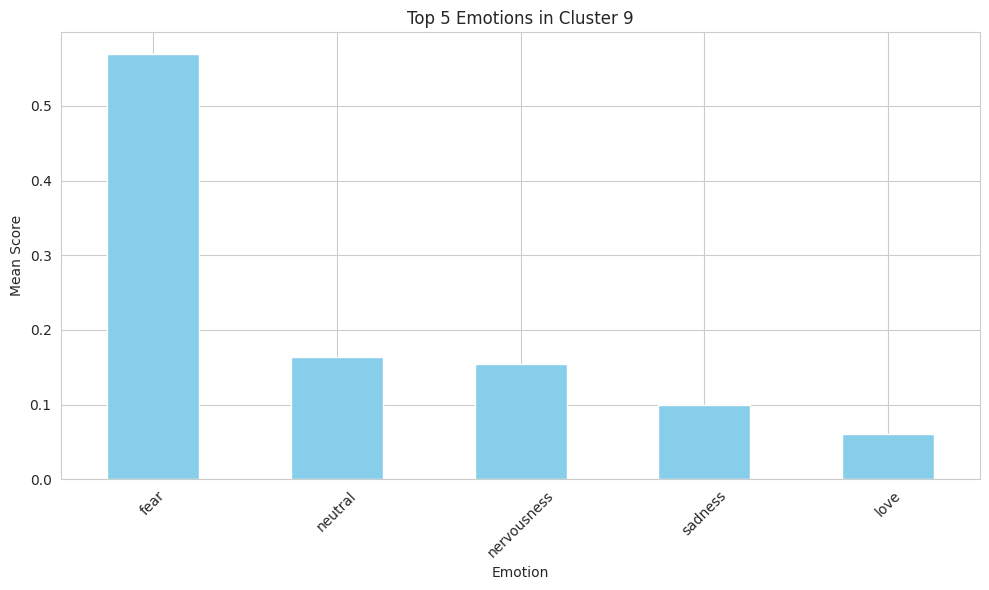


Cluster 10:
Number of songs: 565


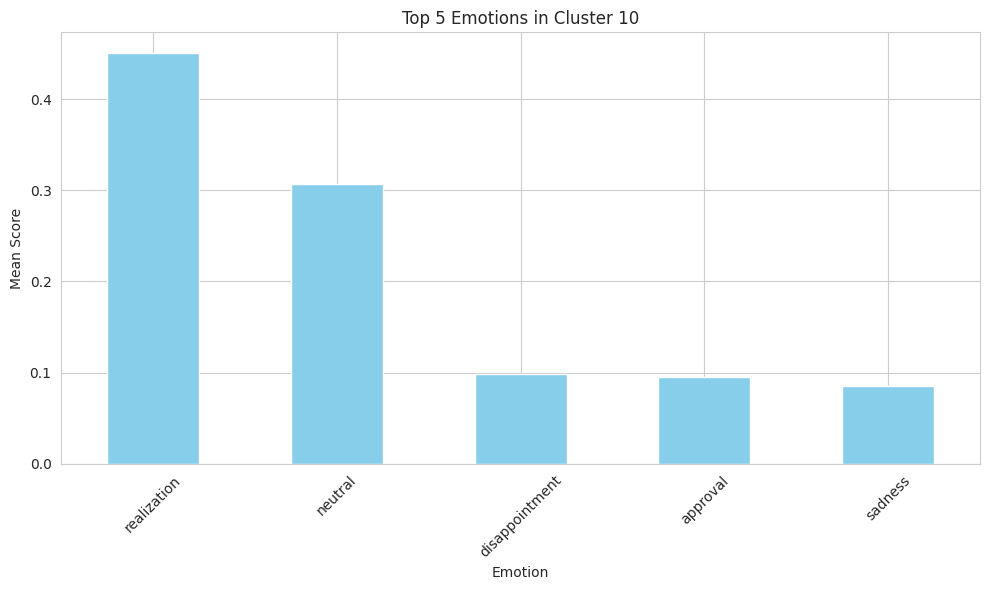


Cluster 11:
Number of songs: 817


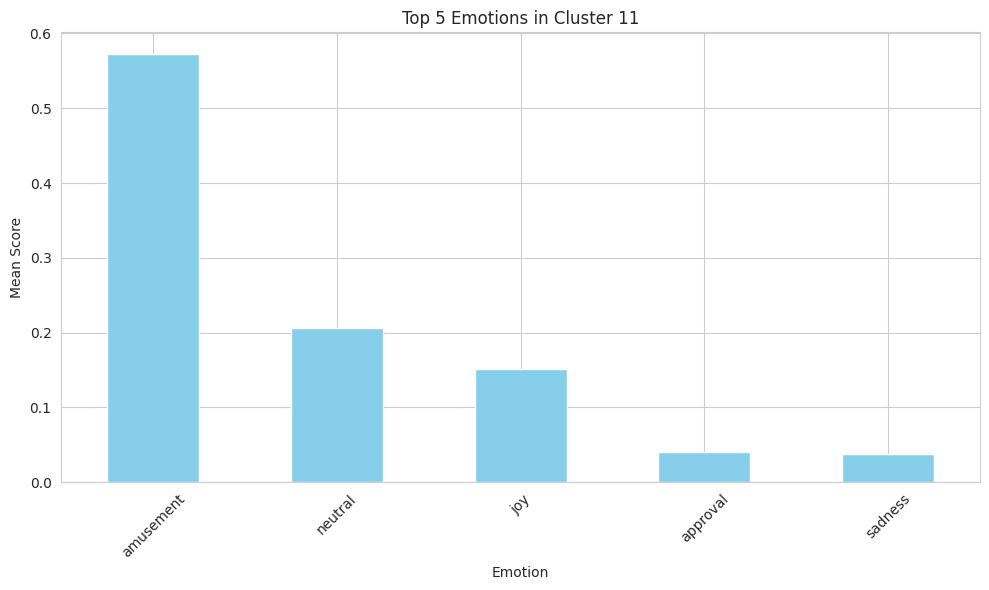


Cluster 12:
Number of songs: 1842


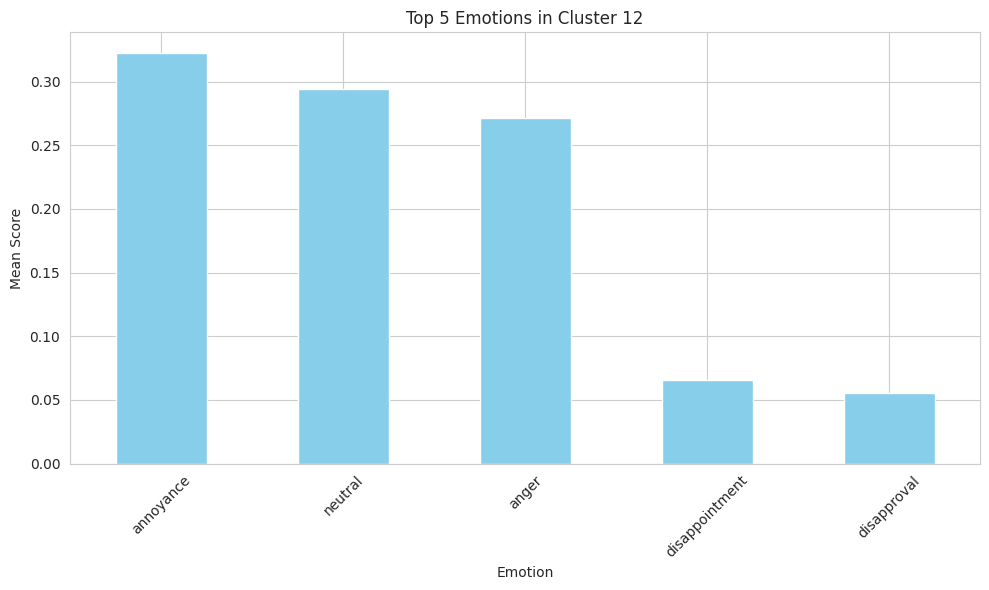


Cluster 13:
Number of songs: 3331


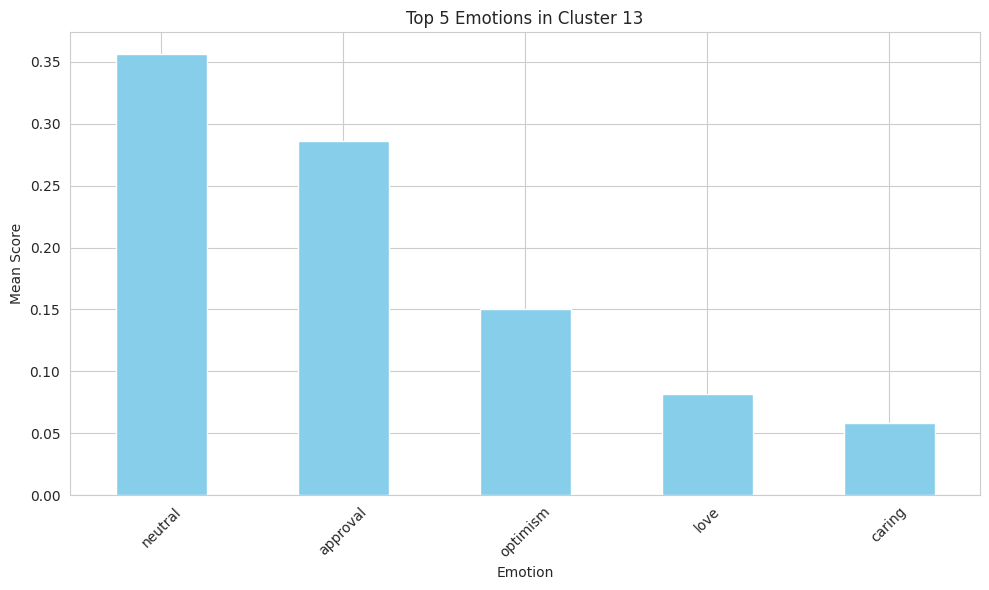


Cluster 14:
Number of songs: 489


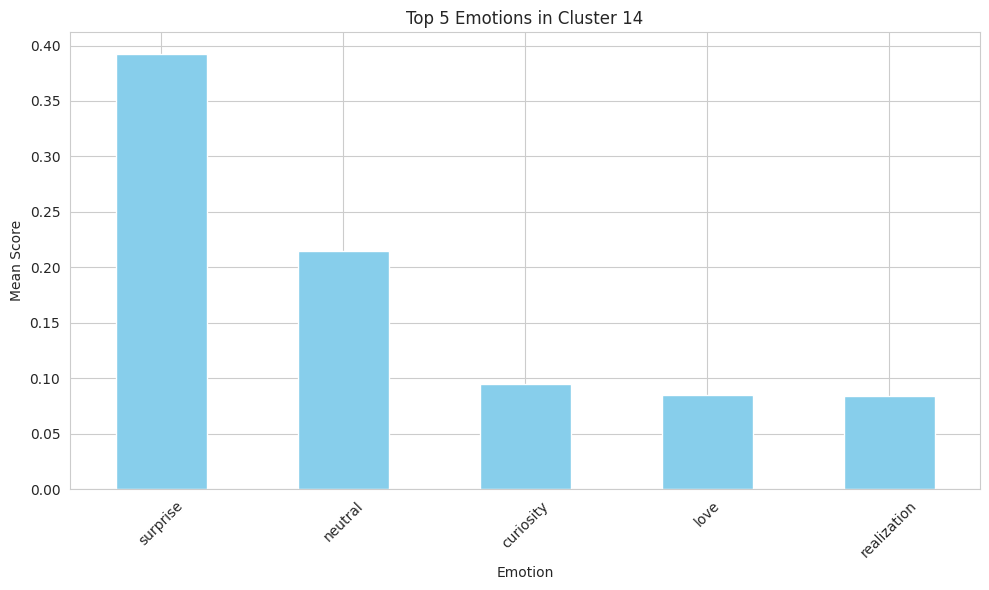


Cluster 15:
Number of songs: 90


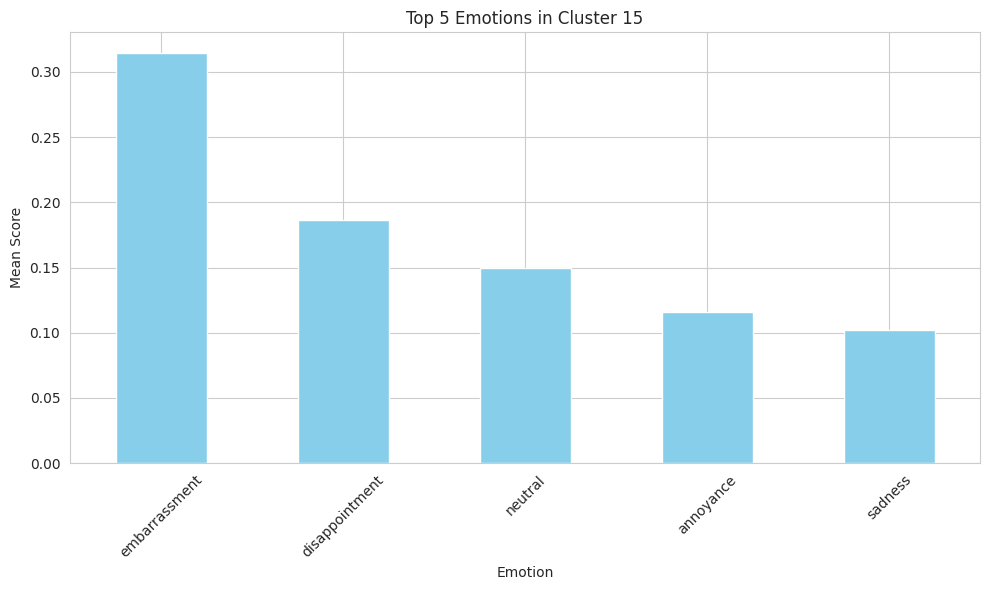


Cluster 16:
Number of songs: 1074


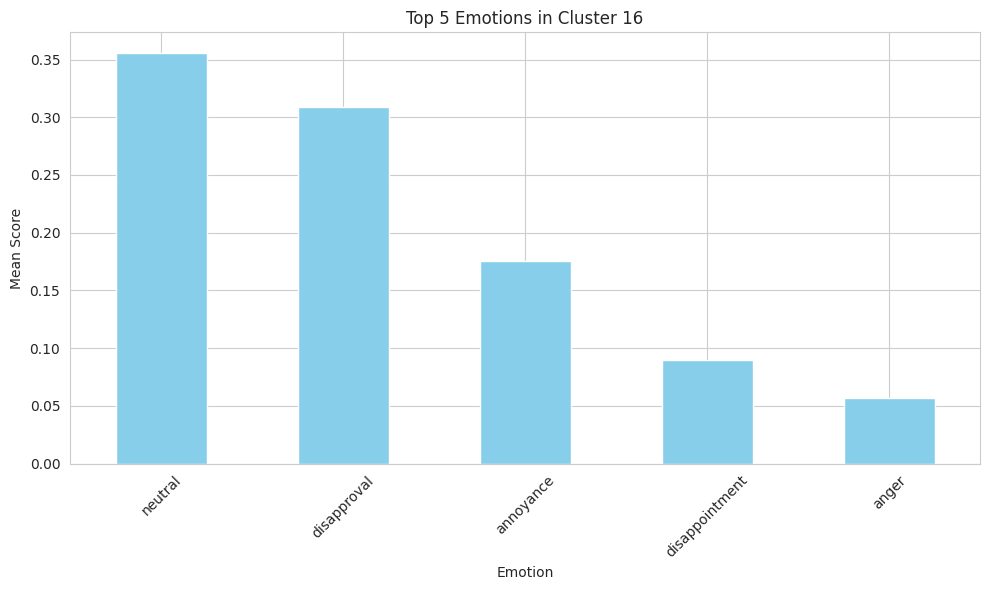


Cluster 17:
Number of songs: 1189


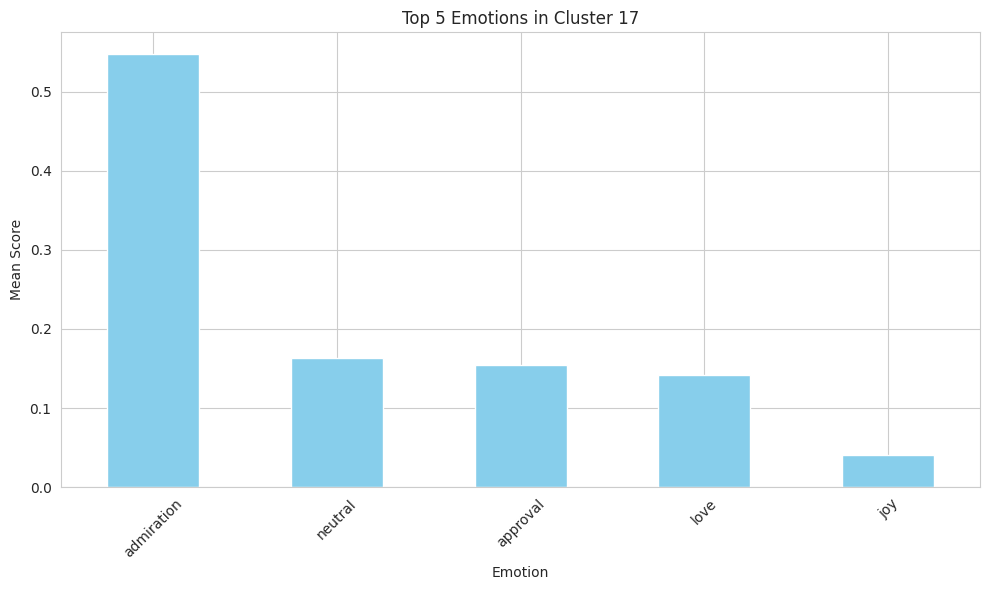


Cluster 18:
Number of songs: 1136


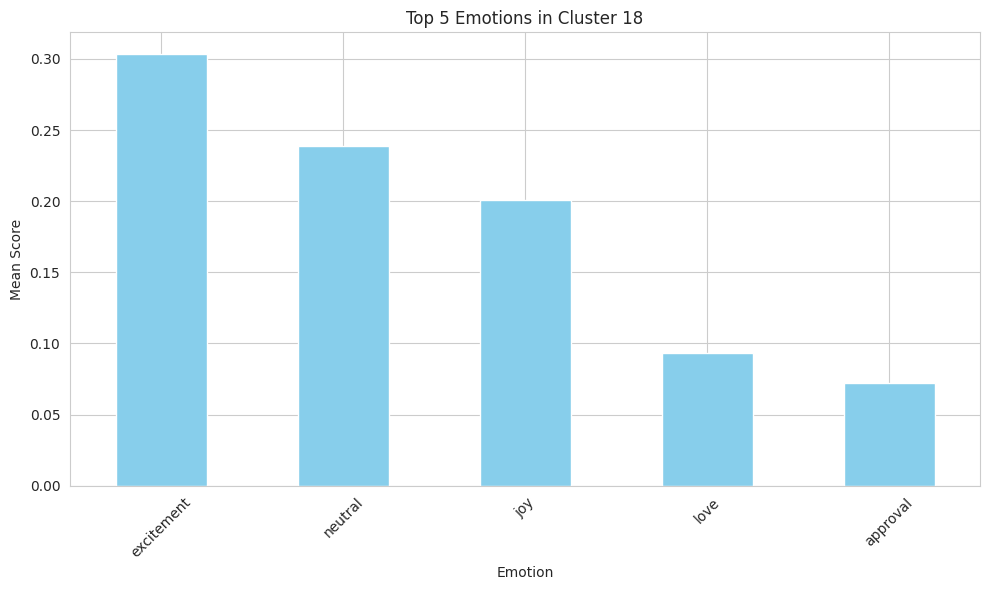

In [74]:
import matplotlib.pyplot as plt

# Iterate over each cluster
for cluster_id in range(num_clusters):
    print(f"\nCluster {cluster_id}:")
    
    # Filter the DataFrame to include only songs in the current cluster
    cluster_df = df_with_labels[df_with_labels['cluster'] == cluster_id]
    
    # Print the count of songs in the cluster
    print("Number of songs:", len(cluster_df))
    
    # Calculate the mean sentiment scores for each song in the cluster
    mean_sentiment_scores = cluster_df[['admiration', 'curiosity', 'approval', 'love', 'confusion', 
                                        'neutral', 'excitement', 'surprise', 'joy', 'optimism', 
                                        'realization', 'disappointment', 'sadness', 'caring', 
                                        'disapproval', 'annoyance', 'desire', 'fear', 'pride', 
                                        'anger', 'amusement', 'nervousness', 'relief', 'grief', 
                                        'remorse', 'disgust', 'gratitude', 'embarrassment']].mean()
    
    # Sort the mean sentiment scores and get the top 5 emotions
    top5_emotions = mean_sentiment_scores.nlargest(5)
    
    # Plot the top 5 relevant emotions
    plt.figure(figsize=(10, 6))
    top5_emotions.plot(kind='bar', color='skyblue')
    plt.title(f'Top 5 Emotions in Cluster {cluster_id}')
    plt.xlabel('Emotion')
    plt.ylabel('Mean Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
